In [ ]:
import datetime
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import datetime
import spacy
from spacy.util import minibatch
import random
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [375]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/suraj/CIC001.xlsx")
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,1/8/2021,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,7/21/1985,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,11/25/2020,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,12/11/1983,walmart,DID NOT PAY,9/16/2020,8/17/2020
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,7/11/2021,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,9/12/1975,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,8/20/2021,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1/14/1986,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,4/1/2020,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,5/14/1997,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020


In [ ]:
set(data['StatusName'])

{'DID NOT PAY', 'PAID'}

In [ ]:
len(data)

18692

In [ ]:
import datetime
data['BirthDate']=pd.to_datetime(data['BirthDate'])
li=[]
a=data['BirthDate'].tolist()
for i in a:
  day=datetime.datetime.now()-i
  li.append(day.days/365)

data['Age']=li
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,1/8/2021,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,11/25/2020,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,7/11/2021,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,8/20/2021,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,4/1/2020,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726


In [ ]:
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stem=PorterStemmer()
lem=WordNetLemmatizer()
stop_words=stopwords.words('english')

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
Data=data['Employer'].tolist()

stem=PorterStemmer()
lem=WordNetLemmatizer()
stop_words=stopwords.words('english')

li=[]
for d in Data:
  try:
    da=nltk.word_tokenize(d)
    word=[]
    for i in da:
      i=i.lower().strip()
      if i not in stop_words:
        w=re.sub('[^a-zA-Z]','',i)
        w=lem.lemmatize(w)
        w=stem.stem(w)
        word.append(w)
        
    clean=" ".join(word)
    li.append(clean)
  except:
    li.append('unemployed')

data['EmployerName']=li
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,1/8/2021,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,11/25/2020,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,7/11/2021,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,8/20/2021,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,4/1/2020,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc


In [ ]:
a=data['EmailAddress'].tolist()
li=[]
for i in a:
  try:
    i=i.split('@')[1].strip().lower()
    li.append(i)
  except:
    try:
      len(i)
      li.append('other')
    except:
      li.append(i)

In [ ]:
a=li
b=set(li)

In [ ]:

lis=[]
for i in b:
  n=0

  for j in a:
    if i==j:
      n=n+1
  if n>=10:
    print(i,"==>",n)
    lis.append(i)

comcast.net ==> 73
hotmail.com ==> 774
aol.com ==> 430
yahoo.com ==> 4553
icloud.com ==> 534
live.com ==> 165
cox.net ==> 16
aim.com ==> 10
gmail.com ==> 11026
sbcglobal.net ==> 47
rocketmail.com ==> 28
mail.com ==> 12
bellsouth.net ==> 16
me.com ==> 41
outlook.com ==> 222
ymail.com ==> 146
att.net ==> 89
charter.net ==> 10
msn.com ==> 58


In [ ]:
em=[]
for i in li:
  try:
    len(i)
    if i in lis:
      i.strip()
      em.append(i)
    else:
      em.append('other')
  except:
    em.append(i)

In [ ]:
data['EmailDomain']=em

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,1/8/2021,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,11/25/2020,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart,yahoo.com
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,7/11/2021,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy,yahoo.com
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,8/20/2021,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit,gmail.com
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,4/1/2020,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc,gmail.com


In [ ]:
add=data['Address'].tolist()
import re
li=[]
for i in add:
  try:
    a=i.lower().strip().split()
    b=i.lower().strip().split('#')
    c=i.lower().strip().split('apar')

    if "apt" in a:
      li.append(6) 

    elif len(c)>1:
      li.append(6) 

    elif 'lot' in a:
      li.append(6)  

    elif len(b)>1:
      b=b[1:]
      for j in b:
        j=j.strip()
        j=j[:2]
        try:
          int(j)
          li.append(6) 
        except:
          li.append(10) 

    else:
      li.append(10)   
  except:
    li.append(i)


data['APT/Home']=li

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,1/8/2021,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,11/25/2020,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart,yahoo.com,10
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,7/11/2021,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy,yahoo.com,10
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,8/20/2021,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit,gmail.com,10
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,4/1/2020,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc,gmail.com,10


In [ ]:
len(data)

18692

In [ ]:
k=0
for i in data['APT/Home'].tolist():
  if i==6:
    k=k+1

k

815

In [ ]:
a=data['FirstName'].tolist()
b=data['LastName'].tolist()
li=[]
for i in range(len(a)):
  li.append((a[i]+" "+b[i]).lower())

data['FullName']=li

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,1/8/2021,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,11/25/2020,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart,yahoo.com,10,tiffany bearrows
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,7/11/2021,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy,yahoo.com,10,andre doss
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,8/20/2021,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit,gmail.com,10,brittni ruark
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,4/1/2020,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc,gmail.com,10,shawn mcnab


In [ ]:
import re
a=data['EmailAddress'].tolist()
li=[]
for i in a:
  try:
    em=i.split('@')[0].lower()    
    em=re.sub('[^a-zA-Z]','',em)
    li.append(em)
  except:
    li.append(i)

b=data['FullName'].tolist()
flaglis=[]
for i in range(len(b)):
  try:
    flag=0
    na=b[i].lower()
    em=na.split(" ")
    for j in em:
      name=j[:3]
      email=li[i]
      num=len(email)-2
      for k in range(num):
        if name==email[k:k+3]:
          flag=flag+1
        else:
          pass
    if flag==3 or flag==4 or flag==2:
      flag=1
    flaglis.append(flag)
  except:
    flaglis.append(li[i])


data['EmailMatch']=flaglis

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,1/8/2021,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,11/25/2020,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart,yahoo.com,10,tiffany bearrows,1.0
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,7/11/2021,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy,yahoo.com,10,andre doss,1.0
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,8/20/2021,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit,gmail.com,10,brittni ruark,0.0
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,4/1/2020,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc,gmail.com,10,shawn mcnab,1.0


In [ ]:
a=data['WorkPhone'].tolist()
b=data['AlternatePhone'].tolist()
c=data['CellPhone'].tolist()
d=data['EmailAddress'].tolist()
e=data['PrimaryPhone'].tolist()

In [ ]:
li=[]
for i in range(len(a)):
  k=k+1
  n=0
  try:
    if len(a[i])>0:
      n=n+1
  except:
    pass

  try:
    if len(b[i])>0:
      n=n+1
  except:
    pass


  try:
    if len(c[i])>0:
      n=n+1
  except:
    pass

  try:
    if len(d[i])>0:
      n=n+1
  except:
    pass

  try:
    if len(e[i])>0:
      n=n+1
  except:
    pass
  li.append(n)
  


data['NoOFContact']=li

In [ ]:
data['LastPaymentDate']=pd.to_datetime(data['LastPaymentDate'], errors = 'coerce')

In [ ]:
import datetime
li=[]
a=data['LastPaymentDate'].tolist()

for i in a:
  day=datetime.datetime.now()-i
  li.append(day.days)

In [ ]:
data['LastPaymentDateDays']=li

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,2020-11-25,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart,yahoo.com,10,tiffany bearrows,1.0,3,288.0
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,2021-07-11,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy,yahoo.com,10,andre doss,1.0,2,60.0
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,2021-08-20,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit,gmail.com,10,brittni ruark,0.0,2,20.0
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,2020-04-01,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc,gmail.com,10,shawn mcnab,1.0,3,526.0


In [ ]:
dic={'BROKEN PROMISE':'less likely',
 'CLICKED':'NA',
 'DISPUTE':'NA',
 'EXPRESSED INTENT':'v.likely',
 'GRACE PERIOD':'v.likely',
 'MADE CONTACT':'un likely',
 'OPENED':'NA',
 'PIF':'v.likely',
 'PORTAL PAYMENT':'likely',
 'PROMISE TO PAY':'likely',
 'SIF':'likely',
 'DID NOT PAY':'un likely',
 'PAID':'likely',
 }

In [ ]:
a=data['StatusName'].tolist()

In [ ]:
li=[]
for i in a:
  li.append(dic[i])

In [ ]:
data['StausY']=li

In [ ]:
# data1=data[data['StausY']=='likely']
# data2=data[data['StausY']=='un likely']

In [ ]:
# data2=data2[:1272]

In [ ]:
# len(data1),len(data2)

In [ ]:
# frames = [data1, data2]
# data = pd.concat(frames)

In [ ]:
len(data)

18692

In [ ]:
data.to_csv('nEWDATA.csv',index=False)

In [ ]:
data=pd.read_csv('nEWDATA.csv')
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,2020-11-25,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart,yahoo.com,10,tiffany bearrows,1.0,3,288.0,un likely
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,2021-07-11,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy,yahoo.com,10,andre doss,1.0,2,60.0,un likely
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,2021-08-20,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit,gmail.com,10,brittni ruark,0.0,2,20.0,un likely
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,2020-04-01,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc,gmail.com,10,shawn mcnab,1.0,3,526.0,un likely


In [ ]:
a=data['EmployerName'].tolist()

In [ ]:
for i in data['EmployerName'].tolist():
  if type(i)!=str:
    print(i,type(i))

nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>
nan <class 'float'>


In [ ]:
len(a)

18692

In [ ]:
data['EmployerName'].isnull().sum()

10

In [ ]:
data['EmployerName'] =data['EmployerName'].fillna(method='ffill')

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/suraj/EmpData1.csv")
d.head()

,Name,Field
0,aegean airlin,Airline
1,aer lingu,Airline
2,aeroflot,Airline
3,aerolinea argentina,Airline
4,aeromexico,Airline


In [ ]:
spacy.__version__

'2.2.4'

In [ ]:
import spacy

nlp = spacy.blank("en")

textcat = nlp.create_pipe(
              "textcat",
              config={
                "exclusive_classes": True,
                "architecture": "bow"})

nlp.add_pipe(textcat)

textcat.add_label("Airline")
textcat.add_label("Bank")
textcat.add_label("Finance")
textcat.add_label("IT")
textcat.add_label("Medical")
textcat.add_label("unemployed")
textcat.add_label("disable")


train_texts = d['Name'].values
train_labels = [{'cats': {'Airline': Field == 'Airline',
                          'Bank': Field == 'Bank',
                          'Finance': Field == 'Finance',
                          'IT': Field == 'IT',
                          'Medical': Field == 'Medical',
                          'unemployed':Field == 'unemployed',
                          'disable':Field == 'disable'

                          }} 
                for Field in d['Field']]

train_data = list(zip(train_texts, train_labels))


from spacy.util import minibatch

spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()
batches = minibatch(train_data, size=32)
for batch in batches:
    texts, labels = zip(*batch)
    nlp.update(texts, labels, sgd=optimizer)


import random

random.seed(1)
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()

losses = {}
for epoch in range(30):
    random.shuffle(train_data)
    batches = minibatch(train_data, size=32)
    for batch in batches:
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd=optimizer, losses=losses)


print(losses)

{'textcat': 1.1077371435949317}


In [ ]:
# texts = ["aegean airlin",
#          "vertic pharmaceut",'abacu feder save bank','alcon laboratori inc','boston consult group','abbevil build loan','abcsystem','unemployment','disablity']

texts = a
docs = [nlp.tokenizer(str(text)) for text in texts]
textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)
predicted_labels = scores.argmax(axis=1)
li=[textcat.labels[label] for label in predicted_labels]

In [ ]:
len(li)

18692

In [ ]:
data['EmpCat']=li

In [ ]:
data.to_csv('nEWDATA1.csv',index=False)

In [ ]:
Data=pd.read_csv('nEWDATA1.csv')
Data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316.0,63564213,315.0,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,IT
1,TIFFANY,BEARROWS,102 HILLCREST AVE,NaN,ROCHELLE,IL,61068.0,63391071,363.0,LOAN BY PHONE OF ILLINOIS LLC,38140622,WRITTEN CONTRACTS,0.00,363.00,0,363.00,2020-11-25,169.00,NaN,815-562-3424,BEARROWSTIFFANY@YAHOO.COM,NaN,815-757-5892,1983-12-11,walmart,DID NOT PAY,9/16/2020,8/17/2020,37.772603,walmart,yahoo.com,10,tiffany bearrows,1.0,3,288.0,un likely,IT
2,ANDRE,DOSS,8018 RIVERVIEW AVE,NaN,KANSAS CITY,KS,66112.0,62624921,485.0,CHECK INTO CASH OF KANSAS LLC,35734232,WRITTEN CONTRACTS,20.00,467.95,0,473.95,2021-07-11,-20.00,NaN,NaN,andredoss3@yahoo.com,NaN,913-202-8507,1975-09-12,UNEMPLOYED,DID NOT PAY,10/31/2019,9/20/2019,46.024658,unemploy,yahoo.com,10,andre doss,1.0,2,60.0,un likely,unemployed
3,BRITTNI,RUARK,35 MERCURY DRIVE,NaN,RICHLAND,WA,99354.0,63481093,600.0,CHECK INTO CASH OF WASHINGTON INC.,38538301,WRITTEN CONTRACTS,95.57,504.43,0,534.43,2021-08-20,-31.07,NaN,NaN,burtny86@gmail.com,NaN,509-572-6156,1986-01-14,Columbia Point Hospitality,DID NOT PAY,11/12/2020,10/16/2020,35.676712,columbia point hospit,gmail.com,10,brittni ruark,0.0,2,20.0,un likely,Finance
4,SHAWN,MCNAB,1825 DROST ST,NaN,SULPHUR,LA,70663.0,63118968,155.0,CHECK INTO CASH OF LOUISIANA INC.,37241316,WRITTEN CONTRACTS,0.00,155.00,0,155.00,2020-04-01,130.00,337-930-3398,337-764-0008,shawnfiser@gmail.com,NaN,NaN,1997-05-14,Doing the most llc,DID NOT PAY,3/3/2020,2/19/2020,24.339726,llc,gmail.com,10,shawn mcnab,1.0,3,526.0,un likely,IT


In [ ]:
from urllib.request import urlopen
li=[]
url = "https://api.census.gov/data/2019/acs/acs5?get=NAME%2CB19301_001E%2CB19013_001E&for=zip%20code%20tabulation%20area"
page = urlopen(url)
html_bytes = page.read()
html = html_bytes.decode("utf-8")

In [ ]:
a=html.split('\n')

In [ ]:
import re
n=0
li0=[]
li1=[]
li2=[]
li3=[]
k=0
for i in a:
  if k!=0:
    name0=i.split(',')[0]
    name1=i.split(',')[1]
    name2=i.split(',')[2]

    name0=re.sub('[^0-9]','',name0)
    name1=re.sub('[^0-9]','',name1)
    name2=re.sub('[^0-9]','',name2)
    name0=str(name0)
    name0=name0[1:]

    li0.append(str(name0))
    li1.append(name1)
    li2.append(name2)

  else:
    k=k+1
    pass


In [ ]:
data=pd.DataFrame({"Zip":li0,"Incom":li1,"Hous/inc":li2})

In [ ]:
data

,Zip,Incom,Hous/inc
0,00601,7493,14361
1,00602,9694,16807
2,00603,11259,16049
3,00606,6093,12119
4,00610,10572,19898
...,...,...,...
33115,43970,,666666666
33116,45617,,666666666
33117,95680,,666666666
33118,78802,,666666666


In [ ]:
a=data['Hous/inc'].tolist()

In [ ]:
li=[]
for i in a:
  if i=='666666666':
    li.append('NA')
  else:
    li.append(i)

data['Hous/inc']=li

In [ ]:
data

,Zip,Incom,Hous/inc
0,00601,7493,14361
1,00602,9694,16807
2,00603,11259,16049
3,00606,6093,12119
4,00610,10572,19898
...,...,...,...
33115,43970,,NA
33116,45617,,NA
33117,95680,,NA
33118,78802,,NA


In [ ]:
a=data['Incom'].tolist()

In [ ]:
li=[]
for i in a:
  if len(i)==0:
    li.append('NA')
  else:
    li.append(i)

In [ ]:
data['Incom']=li

In [ ]:
print(data)

         Zip  Incom Hous/inc
0      00601   7493    14361
1      00602   9694    16807
2      00603  11259    16049
3      00606   6093    12119
4      00610  10572    19898
...      ...    ...      ...
33115  43970     NA       NA
33116  45617     NA       NA
33117  95680     NA       NA
33118  78802     NA       NA
33119  72379     NA       NA

[33120 rows x 3 columns]


In [ ]:
data[['Zip']] = data[['Zip']].astype(int)

In [ ]:
data['Zip'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
33115    False
33116    False
33117    False
33118    False
33119    False
Name: Zip, Length: 33120, dtype: bool

In [ ]:
Data['Zip'] =Data['Zip'].fillna(method='ffill')

In [ ]:
li=[]
for i in Data["Zip"].tolist():
  li.append(int(i))

Data["Zip"]=li

In [ ]:
li=[]
for i in Data["Zip"].tolist():
  li.append(int(i))

Data["Zip"]=li

In [ ]:
li=[]
for i in data["Zip"].tolist():
  li.append(int(i))

data["Zip"]=li

In [ ]:
d=pd.merge(Data,data,left_on='Zip',right_on='Zip')

In [ ]:
d.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,IT,19205,57772
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.0,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2/25/2020,1/28/2020,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,IT,19205,57772
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,12/17/2019,11/29/2019,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,IT,19205,57772
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.0,300.00,0,300.00,NaN,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,1/28/2021,9/18/2020,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,IT,19205,57772
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2/19/2020,1/29/2020,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,IT,19205,57772


In [ ]:
print(d)

       FirstName    LastName  ...  Incom Hous/inc
0          JAYME     GUILLEN  ...  19205    57772
1         MARTIN  MONTELONGO  ...  19205    57772
2          ERIKA      ACOSTA  ...  19205    57772
3      ALEJANDRO      CLAVEL  ...  19205    57772
4         ELVIRA        PINA  ...  19205    57772
...          ...         ...  ...    ...      ...
18598  CHRISTINE     THERIOT  ...  18795    28939
18599     NICOLE       GOWAN  ...  50684    48603
18600    TIMOTHY      STUKER  ...  46458    94934
18601     ASHLEY   SCHILREFF  ...  26067    51250
18602       CODY     BRIDGES  ...  24126    47429

[18603 rows x 40 columns]


In [ ]:
d.to_csv('nEWDATA2.csv',index=False)

In [ ]:
data=pd.read_csv('/content/nEWDATA2.csv')
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,IT,19205.0,57772.0
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.0,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2/25/2020,1/28/2020,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,IT,19205.0,57772.0
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,12/17/2019,11/29/2019,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,IT,19205.0,57772.0
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.0,300.00,0,300.00,NaN,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,1/28/2021,9/18/2020,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,IT,19205.0,57772.0
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2/19/2020,1/29/2020,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,IT,19205.0,57772.0


In [ ]:
len(data)

18603

In [ ]:
data['LastPaymentDate']=pd.to_datetime(data['LastPaymentDate'], errors = 'coerce')

In [ ]:
import datetime
li=[]
a=data['LastPaymentDate'].tolist()

for i in a:
  day=datetime.datetime.now()-i
  li.append(day.days)

In [ ]:
data['LastPaymentDateDays']=li

In [ ]:
data['BirthDate']=pd.to_datetime(data['BirthDate'])
import datetime
li=[]
a=data['BirthDate'].tolist()

for i in a:
  day=datetime.datetime.now()-i
  li.append(day.days/365)

data['Age']=li

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,IT,19205.0,57772.0
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.0,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2/25/2020,1/28/2020,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,IT,19205.0,57772.0
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,12/17/2019,11/29/2019,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,IT,19205.0,57772.0
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.0,300.00,0,300.00,NaT,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,1/28/2021,9/18/2020,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,IT,19205.0,57772.0
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2/19/2020,1/29/2020,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,IT,19205.0,57772.0


In [ ]:
dic={'Airline':9, 'Bank':9, 'Finance':8, 'IT':8, 'Medical':10, 'disable':5, 'unemployed':5}

In [ ]:
a=data['EmpCat'].tolist()

In [ ]:
li=[]
for i in a:
  k=k+1
  li.append(dic[i])

In [ ]:
data['EmpCat']=li

In [ ]:
data.to_csv('nEWDATA3.csv',index=False)

In [ ]:
data=pd.read_csv('/content/nEWDATA3.csv')
data

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.00,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,8,19205.0,57772.0
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.00,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2/25/2020,1/28/2020,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,8,19205.0,57772.0
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.00,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,12/17/2019,11/29/2019,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,8,19205.0,57772.0
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.00,300.00,0,300.00,NaN,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,1/28/2021,9/18/2020,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,8,19205.0,57772.0
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.00,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2/19/2020,1/29/2020,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,8,19205.0,57772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18598,CHRISTINE,THERIOT,134 HELEN ST,NaN,GRAND CHENIER,LA,70643,63338861,405.00,CHECK INTO CASH OF LOUISIANA INC.,37936461,WRITTEN CONTRACTS,292.95,121.00,0,121.00,2021-07-02,8.95,337-504-2947,NaN,NaN,NaN,337-784-0030,1961-06-14,NaN,PAID,8/28/2020,7/10/2020,60.279452,unemployed,NaN,10,christine theriot,NaN,2,69.0,likely,5,18795.0,28939.0
18599,NICOLE,GOWAN,20707 STATE HIGHWAY 140,NaN,STEVINSON,CA,95374,63247920,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37664730,WRITTEN CONTRACTS,238.95,85.00,0,85.00,2021-08-06,8.95,NaN,NaN,NICOLE_GOWAN@YAHOO.COM,NaN,209-564-6985,1994-07-18,Patterson Veterinary Hospital,PAID,6/2/2020,5/15/2020,27.164384,patterson veterinari hospit,yahoo.com,10,nicole gowan,1.0,2,34.0,likely,8,50684.0,48603.0
18600,TIMOTHY,STUKER,336 DELIA STREET,NaN,BATAVIA,MN,60510,57134798,371.50,LOAN BY PHONE OF ILLINOIS LLC,17852320,WRITTEN CONTRACTS,358.95,21.50,0,21.50,2021-08-18,100.00,NaN,NaN,timstuker@gmail.com,NaN,630-899-9907,1982-08-11,TBI Inc.,PAID,6/3/2015,5/19/2015,39.106849,tbi inc,gmail.com,10,timothy stuker,1.0,2,22.0,likely,10,46458.0,94934.0
18601,ASHLEY,SCHILREFF,PO BOX 99,NaN,LINDSAY,OK,73052,62862826,590.65,CHECK INTO CASH OF OKLAHOMA LLC,36308079,WRITTEN CONTRACTS,392.95,206.65,0,206.65,2021-08-20,128.00,NaN,NaN,ashleyschilreff@yahoo.com,NaN,405-863-8960,1983-05-23,Frontier State Bank,PAID,12/17/2019,11/18/2019,38.326027,frontier state bank,yahoo.com,10,ashley schilreff,1.0,2,20.0,likely,8,26067.0,51250.0


In [ ]:
a=data['OriginalBalance'].tolist()
b=data['CurrentBalance'].tolist()

In [ ]:
li=[]
for i in range(len(a)):
  li.append(a[i]-b[i])

In [ ]:
data['Orig-Curr']=li

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc,Orig-Curr
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,12/29/2020,12/7/2020,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,8,19205.0,57772.0,0.0
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.0,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2/25/2020,1/28/2020,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,8,19205.0,57772.0,0.0
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,12/17/2019,11/29/2019,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,8,19205.0,57772.0,0.0
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.0,300.00,0,300.00,NaN,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,1/28/2021,9/18/2020,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,8,19205.0,57772.0,0.0
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2/19/2020,1/29/2020,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,8,19205.0,57772.0,0.0


In [ ]:
data['DateChargedOff']=pd.to_datetime(data['DateChargedOff'])

data['DateAccountOpened']=pd.to_datetime(data['DateAccountOpened'])

In [ ]:
import datetime
li=[]
a=data['DateChargedOff'].tolist()
b=data['DateAccountOpened'].tolist()
for i in range(len(a)):
  day=a[i]-b[i]
  li.append(day.days)

data['DateChargedOff_AccountOpened']=li

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc,Orig-Curr,DateChargedOff_AccountOpened
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,2020-12-29,2020-12-07,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,8,19205.0,57772.0,0.0,22
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.0,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2020-02-25,2020-01-28,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,8,19205.0,57772.0,0.0,28
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,2019-12-17,2019-11-29,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,8,19205.0,57772.0,0.0,18
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.0,300.00,0,300.00,NaN,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,2021-01-28,2020-09-18,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,8,19205.0,57772.0,0.0,132
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2020-02-19,2020-01-29,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,8,19205.0,57772.0,0.0,21


In [ ]:
data.to_csv('nEWDATA4.csv',index=False)

In [ ]:
data=pd.read_csv('/content/nEWDATA4.csv')

In [ ]:
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc,Orig-Curr,DateChargedOff_AccountOpened
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,2020-12-29,2020-12-07,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,8,19205.0,57772.0,0.0,22
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.0,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2020-02-25,2020-01-28,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,8,19205.0,57772.0,0.0,28
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,2019-12-17,2019-11-29,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,8,19205.0,57772.0,0.0,18
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.0,300.00,0,300.00,NaN,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,2021-01-28,2020-09-18,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,8,19205.0,57772.0,0.0,132
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2020-02-19,2020-01-29,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,8,19205.0,57772.0,0.0,21


In [ ]:
data['DateChargedOff']=pd.to_datetime(data['DateChargedOff'])
import datetime
li=[]
a=data['DateChargedOff'].tolist()

for i in a:
  day=datetime.datetime.now()-i
  li.append(day.days)

data['DateChargedOff_Current']=li

In [ ]:
data.to_csv('nEWDATA5.csv',index=False)

In [ ]:
data=pd.read_csv('nEWDATA5.csv')
data.head()

,FirstName,LastName,Address,Address2,City,State,Zip,AccountNumber,OriginalBalance,OriginalCreditor,TypeOfDebt,DebtCategory,PaidToDate,Principal,AccruedInterest,CurrentBalance,LastPaymentDate,LastPaymentAmount,PrimaryPhone,WorkPhone,EmailAddress,AlternatePhone,CellPhone,BirthDate,Employer,StatusName,DateChargedOff,DateAccountOpened,Age,EmployerName,EmailDomain,APT/Home,FullName,EmailMatch,NoOFContact,LastPaymentDateDays,StausY,EmpCat,Incom,Hous/inc,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current
0,JAYME,GUILLEN,18387 ASH ST,NaN,BLOOMINGTON,CA,92316,63564213,315.00,CHECK INTO CASH OF CALIFORNIA INC.,38954406,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2021-01-08,300.00,NaN,909-429-4200,jguillenwfg@gmail.com,NaN,951-250-7481,1985-07-21,Burrtec Waste,DID NOT PAY,2020-12-29,2020-12-07,36.161644,burrtec wast,gmail.com,10,jayme guillen,1.0,3,244.0,un likely,8,19205.0,57772.0,0.0,22,254
1,MARTIN,MONTELONGO,10048 ALDER AVE,NaN,BLOOMINGTON,CA,92316,63078976,191.47,CHECK INTO CASH OF CALIFORNIA INC.,37072145,WRITTEN CONTRACTS,0.0,191.47,0,191.47,2020-02-24,176.47,NaN,NaN,straightjacketguy666@yahoo.com,NaN,909-714-1766,1982-08-11,OS4Labor,DID NOT PAY,2020-02-25,2020-01-28,39.106849,oslabor,yahoo.com,10,martin montelongo,0.0,2,563.0,un likely,8,19205.0,57772.0,0.0,28,562
2,ERIKA,ACOSTA,1017 HAWTHORNE ST,NaN,BLOOMINGTON,CA,92316,62904987,315.00,CHECK INTO CASH OF CALIFORNIA INC.,36418400,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2019-12-27,300.00,NaN,NaN,erikaacosta14@gmail.com,NaN,909-746-6743,1991-05-16,Synnex,DID NOT PAY,2019-12-17,2019-11-29,30.339726,synnex,gmail.com,10,erika acosta,1.0,2,622.0,un likely,8,19205.0,57772.0,0.0,18,632
3,ALEJANDRO,CLAVEL,18389 8TH ST,NaN,BLOOMINGTON,CA,92316,63437045,300.00,CHECK INTO CASH OF CALIFORNIA INC.,38370294,WRITTEN CONTRACTS,0.0,300.00,0,300.00,NaN,0.00,NaN,951-360-0638,alexclavel951@yahoo.com,NaN,951-505-8300,1994-11-27,Ac pro,DID NOT PAY,2021-01-28,2020-09-18,26.802740,ac pro,yahoo.com,10,alejandro clavel,1.0,3,NaN,un likely,8,19205.0,57772.0,0.0,132,224
4,ELVIRA,PINA,9826 OLIVE ST,NaN,BLOOMINGTON,CA,92316,63083017,315.00,CHECK INTO CASH OF CALIFORNIA INC.,37091542,WRITTEN CONTRACTS,0.0,315.00,0,315.00,2020-02-28,300.00,NaN,NaN,elvirapina72@gmail.com,NaN,909-543-7303,1986-03-24,Honeyville,DID NOT PAY,2020-02-19,2020-01-29,35.487671,honeyvil,gmail.com,10,elvira pina,1.0,2,559.0,un likely,8,19205.0,57772.0,0.0,21,568


In [ ]:
data=data[['FirstName','LastName','OriginalBalance',
 'PaidToDate',
 'CurrentBalance',
 'LastPaymentDateDays',
 'LastPaymentAmount',
 'APT/Home',
 'EmailMatch',
 'NoOFContact',
 'Age',
 'EmailDomain',
 'EmpCat',
 'Hous/inc',
 'Incom',
 'Orig-Curr',
 'DateChargedOff_AccountOpened',
 'DateChargedOff_Current',
 'StausY']]

In [ ]:
data.head()

,FirstName,LastName,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StausY
0,JAYME,GUILLEN,315.00,0.0,315.00,244.0,300.00,10,1.0,3,36.161644,gmail.com,8,57772.0,19205.0,0.0,22,254,un likely
1,MARTIN,MONTELONGO,191.47,0.0,191.47,563.0,176.47,10,0.0,2,39.106849,yahoo.com,8,57772.0,19205.0,0.0,28,562,un likely
2,ERIKA,ACOSTA,315.00,0.0,315.00,622.0,300.00,10,1.0,2,30.339726,gmail.com,8,57772.0,19205.0,0.0,18,632,un likely
3,ALEJANDRO,CLAVEL,300.00,0.0,300.00,NaN,0.00,10,1.0,3,26.802740,yahoo.com,8,57772.0,19205.0,0.0,132,224,un likely
4,ELVIRA,PINA,315.00,0.0,315.00,559.0,300.00,10,1.0,2,35.487671,gmail.com,8,57772.0,19205.0,0.0,21,568,un likely


In [ ]:
data.to_csv('nEWDATA6.csv',index=False)

In [377]:
data=pd.read_csv('nEWDATA6.csv')
data.head()

,FirstName,LastName,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StausY
0,JAYME,GUILLEN,315.00,0.0,315.00,244.0,300.00,10,1.0,3,36.161644,gmail.com,8,57772.0,19205.0,0.0,22,254,un likely
1,MARTIN,MONTELONGO,191.47,0.0,191.47,563.0,176.47,10,0.0,2,39.106849,yahoo.com,8,57772.0,19205.0,0.0,28,562,un likely
2,ERIKA,ACOSTA,315.00,0.0,315.00,622.0,300.00,10,1.0,2,30.339726,gmail.com,8,57772.0,19205.0,0.0,18,632,un likely
3,ALEJANDRO,CLAVEL,300.00,0.0,300.00,NaN,0.00,10,1.0,3,26.802740,yahoo.com,8,57772.0,19205.0,0.0,132,224,un likely
4,ELVIRA,PINA,315.00,0.0,315.00,559.0,300.00,10,1.0,2,35.487671,gmail.com,8,57772.0,19205.0,0.0,21,568,un likely


In [378]:
a=data['FirstName'].tolist()
b=data['LastName'].tolist()
li=[]
for i in range(len(a)):
  li.append((a[i]+" "+b[i]).lower())

data['FullName']=li

In [379]:
data.head()

,FirstName,LastName,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StausY,FullName
0,JAYME,GUILLEN,315.00,0.0,315.00,244.0,300.00,10,1.0,3,36.161644,gmail.com,8,57772.0,19205.0,0.0,22,254,un likely,jayme guillen
1,MARTIN,MONTELONGO,191.47,0.0,191.47,563.0,176.47,10,0.0,2,39.106849,yahoo.com,8,57772.0,19205.0,0.0,28,562,un likely,martin montelongo
2,ERIKA,ACOSTA,315.00,0.0,315.00,622.0,300.00,10,1.0,2,30.339726,gmail.com,8,57772.0,19205.0,0.0,18,632,un likely,erika acosta
3,ALEJANDRO,CLAVEL,300.00,0.0,300.00,NaN,0.00,10,1.0,3,26.802740,yahoo.com,8,57772.0,19205.0,0.0,132,224,un likely,alejandro clavel
4,ELVIRA,PINA,315.00,0.0,315.00,559.0,300.00,10,1.0,2,35.487671,gmail.com,8,57772.0,19205.0,0.0,21,568,un likely,elvira pina


In [380]:
data.to_csv('nEWDATA7.csv',index=False)

In [ ]:
data=pd.read_csv('/content/nEWDATA7.csv')

In [381]:
import numpy as np
import time
am = data['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
li=[]
for i in range(0, len(am), 500):
  temp = am[i:i + 500]
  print("value of" +str(i))
  for val in temp:
    val=val.lower()
    name=val.split()
    n1=name[0]
    n2=name[-1]
    url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+n1+"&surname="+n2+"&output=json"
    headers={'User-Agent':user_agent,} 
    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    data = response.read() # The data u need
    a=str(data).split('"gender_probability":"')
    a=a[1][:6]
    a=re.sub('[^a-zA-Z]','',a)
    a=a.lower()
    li.append(a)
    
  time.sleep(5)


value of0
value of500
value of1000
value of1500


HTTPError: ignored

In [ ]:
first_quarter = data[0:500]
print(first_quarter)

     FirstName    LastName  ...     StausY           FullName
0        JAYME     GUILLEN  ...  un likely      jayme guillen
1       MARTIN  MONTELONGO  ...  un likely  martin montelongo
2        ERIKA      ACOSTA  ...  un likely       erika acosta
3    ALEJANDRO      CLAVEL  ...  un likely   alejandro clavel
4       ELVIRA        PINA  ...  un likely        elvira pina
..         ...         ...  ...        ...                ...
495    SHIRLEY       BLACK  ...  un likely      shirley black
496     THOMES     FRAZIER  ...  un likely     thomes frazier
497   DANIELLE       ASKEW  ...  un likely     danielle askew
498      SARAH      HERVIG  ...  un likely       sarah hervig
499       KIEL     KENNEDY  ...     likely       kiel kennedy

[500 rows x 20 columns]


In [ ]:

import numpy as np
import time
am = first_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
female
male
female
male
female
female
male
null
null
female
male
male
null
null
female
female
male
male
male
male
male
female
female
female
female
male
female
male
female
female
female
null
female
null
female
null
null
male
male
female
female
male
female
female
male
female
male
male
female
male
male
female
female
male
female
null
null
null
male
female
male
null
male
male
male
female
male
null
null
male
null
female
female
null
male
female
null
female
female
female
female
male
female
male
male
female
male
female
female
male
female
female
null
female
male
male
female
female
female
female
female
female
male
null
female
female
male
female
male
male
female
null
male
female
null
female
female
female
null
female
female
male
null
female
female
female
male
female
female
female
female
male
female
male
female
null
male
female
null
female
male
null
male
male
male
male
male
female
female
male
female
female
male
female
female
male
male
null
female
male
female
female
female
female
male
fem

In [ ]:
second_quarter = data[501:1000]
print(second_quarter)

     FirstName  LastName  ...     StausY            FullName
501       SEAN     DAVIS  ...  un likely          sean davis
502    MICHAEL    SHAVER  ...     likely      michael shaver
503       MARK   GRONSKI  ...  un likely        mark gronski
504  STEPHANIE  ROBINSON  ...  un likely  stephanie robinson
505     JORDAN    MILLER  ...  un likely       jordan miller
..         ...       ...  ...        ...                 ...
995      EDGAR      SOSA  ...  un likely          edgar sosa
996      LAURA      SOTO  ...  un likely          laura soto
997    ROBERTO      VEGA  ...  un likely        roberto vega
998    YOLANDA   MIRANDA  ...  un likely     yolanda miranda
999   DEYANIRA  CARDENAS  ...  un likely   deyanira cardenas

[499 rows x 20 columns]


In [ ]:

import numpy as np
import time
am= second_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
male
male
female
male
female
null
null
male
female
female
male
null
male
null
male
female
female
female
female
female
female
male
male
male
female
male
male
female
male
male
male
null
male
female
female
female
female
null
null
male
female
null
male
null
null
female
null
null
null
male
female
female
female
null
null
null
male
male
null
female
female
female
female
female
female
female
female
female
female
female
female
male
male
female
female
male
male
female
null
male
male
female
female
female
null
female
male
female
female
female
female
female
female
male
female
male
female
female
male
female
null
female
null
male
female
null
male
male
male
null
male
male
null
male
male
female
male
female
female
male
female
female
female
male
null
female
female
male
male
male
null
female
female
male
male
null
male
male
male
male
female
male
male
female
null
female
female
male
female
female
female
male
male
null
female
female
null
female
male
male
male
male
male
female
female
null
female
male
male


In [ ]:
Third_quarter = data[1001:1500]
print(Third_quarter)

      FirstName  LastName  ...     StausY            FullName
1001     JASMYN    FULLER  ...  un likely       jasmyn fuller
1002    ERNESTO    TESCUM  ...  un likely      ernesto tescum
1003      TARAZ     WELCH  ...  un likely         taraz welch
1004     JAMLIA    RIVERS  ...  un likely       jamlia rivers
1005       ERIN    MILATZ  ...     likely         erin milatz
...         ...       ...  ...        ...                 ...
1495   AQUARIUS   BARBOUR  ...  un likely    aquarius barbour
1496      LANEI  GONZALES  ...     likely      lanei gonzales
1497   JEZMAINE    AUSTIN  ...  un likely     jezmaine austin
1498    MELISSA      KING  ...  un likely        melissa king
1499  JOSEPHINE  MARTINEZ  ...  un likely  josephine martinez

[499 rows x 20 columns]


In [ ]:

import numpy as np
import time
am= Third_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
null
null
female
null
male
male
male
female
female
male
male
female
female
male
female
female
female
male
male
female
female
male
male
female
female
female
male
male
null
null
female
male
female
male
null
female
male
null
male
female
female
female
male
male
null
female
female
male
male
male
male
female
female
male
female
null
male
female
male
female
null
male
female
female
null
null
null
female
null
null
female
female
female
null
female
female
female
null
male
null
female
female
female
male
female
female
female
null
null
null
male
female
male
female
female
male
female
female
female
null
male
female
male
female
female
female
male
null
female
female
male
female
male
male
male
male
male
female
female
female
male
female
female
null
female
null
null
female
null
male
female
female
male
male
female
female
female
male
null
null
null
male
male
female
female
null
null
male
null
female
null
null
null
null
female
male
female
null
null
female
female
female
female
female
female
male
null

In [ ]:
Four_quarter = data[1501:2000]
print(Four_quarter)


     FirstName   LastName  ...     StausY           FullName
1501   BREANNE  FRUNGILLO  ...  un likely  breanne frungillo
1502    YVONNE     SAPIEN  ...  un likely      yvonne sapien
1503   KIRSTEN    SHULLEY  ...  un likely    kirsten shulley
1504   ANTHONY   WICKWARE  ...     likely   anthony wickware
1505    LELANI       SAMS  ...  un likely        lelani sams
...        ...        ...  ...        ...                ...
1995   GREGORY      ROUTT  ...  un likely      gregory routt
1996  DANIELLE      JONES  ...  un likely     danielle jones
1997   NATALIE    HERBERT  ...  un likely    natalie herbert
1998   DERAILE       NUNN  ...  un likely       deraile nunn
1999   MAURICE      JONES  ...  un likely      maurice jones

[499 rows x 20 columns]


In [ ]:

import numpy as np
import time
am= Four_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
male
female
male
female
female
null
female
female
female
male
male
male
male
male
female
female
female
male
male
male
female
female
female
female
male
female
female
female
female
female
female
female
male
male
female
male
female
male
male
female
female
female
female
female
female
null
male
male
female
female
null
null
male
female
male
male
male
female
male
null
male
male
female
female
null
female
male
male
null
null
female
female
male
male
female
female
female
female
null
female
female
male
female
female
female
female
male
null
female
null
male
female
male
male
null
female
null
male
null
female
female
male
female
female
null
female
female
female
female
female
null
female
female
female
female
male
female
female
female
male
female
male
female
null
female
null
null
female
female
null
female
female
female
male
female
female
female
female
female
female
male
female
female
female
female
male
female
male
female
male
male
female
female
female
female
female
female
female
mal

In [ ]:
Five_quarter = data[2001:2500]
print(Five_quarter)


     FirstName  LastName  ...     StausY          FullName
2001   MELINDA  STALLARD  ...     likely  melinda stallard
2002   MICHAEL    MASSEY  ...  un likely    michael massey
2003    KAYLEE     JONES  ...  un likely      kaylee jones
2004     JARED    TAYLOR  ...  un likely      jared taylor
2005     LAURA    NORMAN  ...  un likely      laura norman
...        ...       ...  ...        ...               ...
2495   MELISSA   VALERIO  ...  un likely   melissa valerio
2496   KENYADA     BERRY  ...  un likely     kenyada berry
2497     STACY     BODEN  ...  un likely       stacy boden
2498      JOHN   MERRITT  ...  un likely      john merritt
2499    JACKIE    HUGHES  ...  un likely     jackie hughes

[499 rows x 20 columns]


In [ ]:

import numpy as np
import time
am= Five_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
female
male
female
male
female
female
male
female
female
female
female
female
female
female
female
male
male
female
female
female
female
male
female
male
male
female
female
male
male
male
male
female
null
female
null
null
female
null
female
female
female
female
female
female
female
female
female
female
male
female
female
male
male
female
female
male
male
male
male
female
female
female
female
female
female
male
female
female
female
female
female
male
female
female
null
null
male
female
null
male
null
null
null
female
null
female
null
male
male
female
male
female
female
male
female
female
male
male
male
male
male
female
male
female
female
male
female
female
female
female
null
male
male
male
null
female
female
male
female
male
female
female
female
female
male
male
female
female
male
male
female
male
female
null
female
male
male
female
male
female
female
female
male
female
female
female
female
male
female
female
male
male
female
female
male
female
female
male
female
female
null

In [ ]:
Six_quarter = data[2501:3000]
print(Six_quarter)


      FirstName   LastName  ...     StausY          FullName
2501    KRISTIN     WILLIS  ...  un likely    kristin willis
2502      DEION     FULTON  ...     likely      deion fulton
2503    JEANICE      ORTIZ  ...     likely     jeanice ortiz
2504      GOLDY     GARCIA  ...  un likely      goldy garcia
2505    ARACELY     ALDANA  ...  un likely    aracely aldana
...         ...        ...  ...        ...               ...
2995     PAMELA     CARTER  ...  un likely     pamela carter
2996     PAMELA     CARTER  ...  un likely     pamela carter
2997       JOEL  GUTIERREZ  ...  un likely    joel gutierrez
2998  STEPHANIE       HILL  ...  un likely    stephanie hill
2999    SHAILEE   HOULIHAN  ...     likely  shailee houlihan

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Six_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
null
female
female
female
male
female
female
null
null
null
female
female
female
female
female
null
male
female
male
null
male
male
female
male
female
female
female
female
female
male
female
null
female
null
female
female
female
male
female
female
null
male
female
female
female
female
male
male
null
male
null
female
null
female
null
null
female
male
female
male
female
female
male
male
male
male
male
male
male
null
null
male
null
female
female
male
null
male
female
female
female
female
female
female
null
male
female
male
male
male
female
female
female
female
female
female
female
male
female
female
male
female
female
female
female
female
female
female
female
null
male
null
female
male
female
male
female
female
null
female
female
female
male
male
null
null
male
null
female
null
male
female
female
male
female
female
female
female
female
male
male
male
male
male
male
female
female
female
female
male
male
female
female
male
null
male
null
male
male
female
male
female
male
female


In [ ]:
Seven_quarter = data[3001:3500]
print(Seven_quarter)

        FirstName   LastName  ...     StausY             FullName
3001       NATHAN      BROWN  ...  un likely         nathan brown
3002      TIFFANY  QUINANOLA  ...     likely    tiffany quinanola
3003      TIFFANY  QUINANOLA  ...     likely    tiffany quinanola
3004      SINAVAA     ASAELI  ...  un likely       sinavaa asaeli
3005  CHRISTOPHER    THACKER  ...  un likely  christopher thacker
...           ...        ...  ...        ...                  ...
3495        EBONY    MERRITT  ...  un likely        ebony merritt
3496     TRELISHA      EVANS  ...  un likely       trelisha evans
3497    MARAGARET     BROOKS  ...  un likely     maragaret brooks
3498       LONNIE      BURKS  ...  un likely         lonnie burks
3499       PORTIA      WHITE  ...  un likely         portia white

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Seven_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
female
female
null
male
female
female
female
female
male
female
female
male
female
female
male
female
male
male
male
female
female
null
female
male
male
male
female
female
null
male
male
null
male
male
female
female
female
male
female
male
male
female
male
null
null
null
null
male
male
male
null
male
female
female
female
male
male
female
female
female
female
female
female
female
female
female
female
female
male
male
male
male
null
male
male
female
female
male
null
male
female
female
female
female
male
female
male
female
null
male
female
female
male
female
female
female
null
male
female
null
male
null
female
female
male
female
female
female
male
null
female
male
female
male
male
female
female
male
male
female
female
null
female
female
female
female
female
null
null
male
female
null
male
null
null
male
male
male
female
female
female
male
female
female
male
female
female
male
null
female
null
female
female
null
male
null
female
female
male
female
female
male
female
null
female
male
f

In [ ]:
Eight_quarter = data[3501:4000]
print(Eight_quarter)


        FirstName  LastName  ...     StausY          FullName
3501      TIFFANY       LEE  ...  un likely       tiffany lee
3502       BOBBIE    HUGHES  ...  un likely     bobbie hughes
3503        DELIA    WINZER  ...  un likely      delia winzer
3504         JOHN  UPCHURCH  ...  un likely     john upchurch
3505       TYRONE      LEVY  ...  un likely       tyrone levy
...           ...       ...  ...        ...               ...
3995      MONIQUE    PARKER  ...  un likely    monique parker
3996     GABRIELA   MARQUEZ  ...  un likely  gabriela marquez
3997      JESSICA   MANNING  ...  un likely   jessica manning
3998       CELINA   CABELLO  ...  un likely    celina cabello
3999  CHRISTOPHER      HOOD  ...  un likely  christopher hood

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Eight_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
male
male
male
female
female
female
female
male
female
male
male
female
male
null
male
female
female
female
male
male
female
female
null
male
female
female
female
null
null
male
male
female
null
female
null
female
female
female
female
female
null
female
null
female
female
male
male
male
female
female
male
male
female
male
male
male
male
female
female
male
female
female
male
male
female
null
male
female
female
male
male
male
female
female
female
male
male
female
female
female
female
male
female
male
female
null
female
female
null
female
female
female
female
female
female
female
female
female
female
male
male
male
female
female
null
female
null
female
male
female
male
male
male
male
male
null
male
female
female
male
female
female
male
female
female
male
male
male
male
male
male
female
female
female
female
female
female
null
female
female
null
female
female
null
female
male
null
female
male
female
male
male
male
female
female
female
female
female
male
male
null
male
n

In [ ]:
Nine_quarter = data[4001:4500]
print(Nine_quarter)


       FirstName LastName  ...     StausY          FullName
4001  FELONDREIA    WHEAT  ...  un likely  felondreia wheat
4002        LISA   MCGHEE  ...  un likely       lisa mcghee
4003     JUANITA   HORTON  ...  un likely    juanita horton
4004        SAUL  PERALES  ...  un likely      saul perales
4005     DONISHA  SUMRELL  ...     likely   donisha sumrell
...          ...      ...  ...        ...               ...
4495      TAYLOR     JOHN  ...  un likely       taylor john
4496      CARRIE      MOI  ...  un likely        carrie moi
4497      HELENA      JOE  ...  un likely        helena joe
4498      CARRIE      MOI  ...  un likely        carrie moi
4499     ARTISHA    FRIAS  ...  un likely     artisha frias

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Nine_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

null
female
female
male
null
male
female
male
female
male
male
female
female
null
male
male
female
null
female
male
male
male
female
female
male
female
female
male
female
female
male
male
female
male
null
female
null
null
female
female
male
female
female
female
male
null
female
female
female
male
female
female
male
female
female
male
male
male
female
male
null
null
female
male
female
male
female
male
female
null
null
female
male
null
male
male
male
female
male
male
male
male
male
male
null
male
male
female
female
male
male
female
female
male
null
male
male
male
male
null
female
male
male
female
female
null
male
male
male
female
male
female
female
male
female
female
male
male
male
female
male
null
female
male
male
female
male
female
female
male
male
male
female
female
female
male
female
female
male
male
male
male
male
male
female
male
male
female
male
male
female
female
female
female
female
female
female
null
male
male
null
female
female
male
female
null
male
female
male
male
female
mal

In [ ]:
Ten_quarter = data[4501:5000]
print(Ten_quarter)

      FirstName   LastName  ...     StausY             FullName
4501    MICHAEL     THARPE  ...  un likely       michael tharpe
4502    BRIANNA       TRAN  ...  un likely         brianna tran
4503     TRAVIS    SCHMIDT  ...  un likely       travis schmidt
4504       TAIA     RADNEY  ...     likely          taia radney
4505      TYLER    COLLENE  ...  un likely        tyler collene
...         ...        ...  ...        ...                  ...
4995     CARLOS    AGUIRRE  ...  un likely       carlos aguirre
4996      TRACY    CORBETT  ...     likely        tracy corbett
4997     ROSHAN  HENDERSON  ...  un likely     roshan henderson
4998       AVIS      JONES  ...  un likely           avis jones
4999  ARIAYELLE  HENDERSON  ...  un likely  ariayelle henderson

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Ten_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
female
male
female
male
female
male
null
male
female
male
null
male
female
male
male
female
male
male
male
male
female
male
male
male
male
female
male
female
female
null
male
null
female
female
male
female
female
female
female
female
female
male
null
male
male
null
male
male
male
null
male
male
female
female
female
male
female
male
female
male
male
male
female
female
female
female
female
male
female
male
male
female
male
male
female
female
female
female
female
female
null
female
male
female
female
null
male
female
male
female
null
female
null
female
male
female
male
female
female
null
female
female
male
female
female
female
male
female
female
male
null
null
female
female
null
female
female
male
female
female
male
male
female
female
female
female
female
female
male
null
female
female
female
female
female
female
male
female
female
male
female
female
female
male
female
female
female
female
male
female
female
null
female
male
female
male
female
male
female
male
female
null
male
female

In [ ]:
Eleven_quarter = data[5001:5500]
print(Eleven_quarter)

        FirstName  LastName  ...     StausY             FullName
5001        RILEY  TRAMMELL  ...  un likely       riley trammell
5002      TOSHONA       LEE  ...  un likely          toshona lee
5003       AMANDA      DILL  ...     likely          amanda dill
5004      PANDORA   COPPOCK  ...     likely      pandora coppock
5005        MARCO   WILBORN  ...  un likely        marco wilborn
...           ...       ...  ...        ...                  ...
5495      CANDACE   BENNETT  ...  un likely      candace bennett
5496         JOHN   DOUGLAS  ...     likely         john douglas
5497  CHRISTOPHER   BROWDER  ...  un likely  christopher browder
5498        JAMES    FOXALL  ...  un likely         james foxall
5499      KATHRYN   BASKETT  ...     likely      kathryn baskett

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Eleven_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
null
female
female
male
female
male
male
female
female
male
female
female
female
male
male
female
male
male
female
male
male
female
male
female
male
female
null
female
female
male
null
female
male
female
null
female
male
female
female
male
female
female
female
male
female
male
null
male
female
male
female
female
null
female
female
male
null
female
null
male
female
null
female
female
male
null
male
female
male
female
female
null
male
male
female
male
male
female
female
female
female
female
female
null
female
female
female
female
male
male
female
female
male
male
female
female
female
female
female
female
female
female
male
male
female
null
male
male
male
female
female
male
null
female
null
female
male
male
null
female
female
female
female
null
null
female
male
male
female
female
female
male
female
male
female
male
male
female
male
null
female
female
null
female
female
male
female
female
male
female
female
female
female
male
female
male
male
female
female
female
female
male
male
fe

In [ ]:
Twelve_quarter = data[5501:6000]
print(Twelve_quarter)

     FirstName    LastName  ...     StausY           FullName
5501    DEMOND      THOMAS  ...  un likely      demond thomas
5502    MARCEL  DENTREMONT  ...  un likely  marcel dentremont
5503    LAGINA       FOOTS  ...  un likely       lagina foots
5504    MARCEL  DENTREMONT  ...  un likely  marcel dentremont
5505    HARLIN        IVEY  ...  un likely        harlin ivey
...        ...         ...  ...        ...                ...
5995     SIMON      QUIROZ  ...  un likely       simon quiroz
5996     KATHY      SWADER  ...  un likely       kathy swader
5997    VIOLET        ALBA  ...  un likely        violet alba
5998   MELISSA    FORCILLO  ...  un likely   melissa forcillo
5999    DENISE       PEREZ  ...  un likely       denise perez

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twelve_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
male
null
male
male
female
male
female
male
male
null
female
female
female
male
male
female
female
female
female
female
male
female
female
female
female
female
female
male
null
female
female
female
male
female
female
male
male
male
male
male
male
female
male
female
null
female
female
male
null
male
female
female
female
male
female
female
male
female
female
female
male
null
female
female
female
male
null
null
female
null
female
male
female
female
male
male
male
female
female
male
male
male
male
female
male
male
male
male
female
male
female
female
female
male
male
female
female
male
male
female
male
female
female
male
female
female
male
null
female
female
male
female
male
female
null
female
female
female
female
female
null
female
female
female
female
null
female
male
null
male
male
male
male
female
female
male
female
female
male
female
female
female
null
male
null
null
null
male
null
female
female
female
female
male
female
female
male
female
female
female
female
null
female
female
f

In [ ]:
Thirteen_quarter = data[6001:6500]
print(Thirteen_quarter)

      FirstName    LastName  ...     StausY           FullName
6001      TOBIN      HURLEY  ...  un likely       tobin hurley
6002      AMBER   HERNANDEZ  ...     likely    amber hernandez
6003    CRYSTAL     SANDERS  ...  un likely    crystal sanders
6004    CRYSTAL     SANDERS  ...  un likely    crystal sanders
6005     ASHLEY    ESQUIVEL  ...  un likely    ashley esquivel
...         ...         ...  ...        ...                ...
6495     ROBERT  WILLOUGHBY  ...  un likely  robert willoughby
6496  KEISHIANA     LAMPKIN  ...  un likely  keishiana lampkin
6497    JOHNETH       SIMON  ...  un likely      johneth simon
6498    CHARLES      MCCAIN  ...  un likely     charles mccain
6499   ROCHELLE     MOLETTE  ...  un likely   rochelle molette

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Thirteen_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
female
female
female
female
female
female
male
female
female
female
female
female
female
male
female
null
male
null
male
female
male
female
female
male
female
female
male
male
female
male
null
male
male
male
male
female
male
male
male
female
female
female
female
male
null
female
null
female
male
female
null
null
male
female
male
null
male
male
null
female
male
female
male
female
male
null
female
female
female
female
male
null
male
male
female
female
female
null
female
female
female
male
female
female
male
female
male
male
female
female
female
female
female
female
female
male
male
male
male
female
male
female
null
null
female
female
male
null
female
null
male
female
female
male
male
female
male
male
female
male
female
null
female
female
female
female
female
male
male
null
male
male
male
male
female
female
male
female
male
male
female
female
female
female
female
male
female
male
female
male
male
female
female
female
male
female
male
female
female
female
female
male
female
female
fem

In [ ]:
Fourteen_quarter = data[6501:7000]
print(Fourteen_quarter)

     FirstName   LastName  ...     StausY           FullName
6501  DEVONTAY   ROBERSON  ...  un likely  devontay roberson
6502    BRANDY      BONEY  ...  un likely       brandy boney
6503   SANISHA       NOEL  ...  un likely       sanisha noel
6504    ANITRA     KIMBLE  ...  un likely      anitra kimble
6505  EBCOISHA    QUINNEY  ...  un likely   ebcoisha quinney
...        ...        ...  ...        ...                ...
6995     CASEY    KEELING  ...  un likely      casey keeling
6996    LYNDIE  ALEXANDER  ...  un likely   lyndie alexander
6997   SHANICE    JOHNSON  ...  un likely    shanice johnson
6998       AMY      PEASE  ...  un likely          amy pease
6999    BRENDA       EGAN  ...  un likely        brenda egan

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Fourteen_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
female
null
null
null
female
male
female
female
null
null
female
male
null
female
female
male
female
male
female
female
null
female
female
male
female
female
female
female
female
male
female
female
null
female
null
null
female
female
null
null
female
female
female
male
female
female
male
male
female
female
male
female
null
female
male
male
null
male
null
male
male
female
male
null
male
male
female
female
male
male
male
female
female
null
female
female
male
null
male
female
female
male
male
female
female
female
male
male
female
female
male
male
female
female
female
null
female
female
male
male
female
female
male
female
null
male
male
male
male
female
male
female
female
male
male
male
male
male
female
female
male
male
male
male
female
female
male
male
null
null
null
female
female
male
male
female
female
null
null
female
female
female
female
male
female
female
female
female
female
female
female
male
male
null
female
male
male
male
female
female
female
female
male
female
female
male
f

In [ ]:
Fifteen_quarter = data[7001:7500]
print(Fifteen_quarter)

        FirstName   LastName  ...     StausY            FullName
7001        HALEY      SMITH  ...  un likely         haley smith
7002          KEN     BROOKS  ...  un likely          ken brooks
7003  CHRISTOPHER     CONGER  ...  un likely  christopher conger
7004        DAVID  MALARCHER  ...  un likely     david malarcher
7005        OSHAY       GUNN  ...  un likely          oshay gunn
...           ...        ...  ...        ...                 ...
7495      ERNESTO      AVILA  ...  un likely       ernesto avila
7496       RACHEL   CALVILLO  ...  un likely     rachel calvillo
7497      DESTINY   PARISEAU  ...  un likely    destiny pariseau
7498         NICK  MALCOMSON  ...  un likely      nick malcomson
7499       BREANA     WYCUFF  ...  un likely       breana wycuff

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am= Fifteen_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
male
male
male
null
female
male
male
male
male
female
null
female
male
female
female
male
male
male
male
male
male
female
male
female
female
female
female
female
null
male
female
female
male
female
male
female
male
female
female
null
female
female
male
male
male
male
female
female
female
female
male
male
male
female
male
female
female
female
female
male
male
male
female
female
female
male
female
female
female
female
female
female
null
female
null
null
null
null
male
male
female
male
female
female
female
male
male
male
female
male
male
male
male
null
null
male
null
null
female
male
male
female
male
null
null
female
male
male
female
female
female
male
male
male
male
female
female
null
male
male
male
female
male
null
male
male
male
female
female
male
female
male
male
male
male
male
female
male
male
female
male
female
male
null
null
male
male
female
female
female
null
male
male
female
female
female
female
male
male
female
male
female
male
null
female
male
female
male
male
femal

In [ ]:
Sixteen_quarter = data[7501:8000]
print(Sixteen_quarter)

      FirstName  LastName  ...     StausY           FullName
7501      DAVID      LOZA  ...  un likely         david loza
7502      CECIL   PEARSON  ...  un likely      cecil pearson
7503     JUSTIN    DAILEY  ...  un likely      justin dailey
7504  STEPHANIE   PERRINE  ...  un likely  stephanie perrine
7505    JESSICA      ODOM  ...  un likely       jessica odom
...         ...       ...  ...        ...                ...
7995      LAYNE   DELATTE  ...  un likely      layne delatte
7996     RAKEEM     BABIN  ...  un likely       rakeem babin
7997     KELSEY      LAMB  ...  un likely        kelsey lamb
7998      TOMIA  THOMPSON  ...  un likely     tomia thompson
7999    SHANNON     HOGAN  ...  un likely      shannon hogan

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Sixteen_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
male
male
female
female
male
female
null
null
female
null
male
male
male
female
male
female
male
male
female
female
male
null
male
null
male
male
null
female
male
female
male
male
female
null
male
male
female
null
female
male
null
male
male
female
null
male
male
female
male
female
female
male
male
male
male
male
female
female
male
female
female
female
female
female
male
female
male
null
female
male
male
female
female
female
male
male
male
male
female
null
null
null
null
female
null
female
male
null
male
female
male
female
female
female
male
male
null
null
female
female
male
female
female
male
null
male
female
male
male
male
male
null
null
male
male
male
male
female
null
female
female
female
male
female
male
female
female
male
female
female
male
male
female
male
female
male
male
female
male
female
male
female
male
male
male
male
null
male
null
female
male
female
female
null
male
female
null
null
female
male
female
female
male
male
male
female
null
female
male
male
male
male
female


In [ ]:
Seventeen_quarter = data[8001:8500]
print(Seventeen_quarter)

     FirstName   LastName  ...     StausY           FullName
8001      FREE    KENNEDY  ...  un likely       free kennedy
8002   VANESSA      PEREZ  ...  un likely      vanessa perez
8003       ANA  GUTIERREZ  ...  un likely      ana gutierrez
8004     DAIJA      SMITH  ...  un likely        daija smith
8005   RICARDO       SOTO  ...  un likely       ricardo soto
...        ...        ...  ...        ...                ...
8495     NGOZI   OKANMELU  ...  un likely     ngozi okanmelu
8496    MICHON      ADAMS  ...  un likely       michon adams
8497  MICHELLE   BRADSHAW  ...  un likely  michelle bradshaw
8498  VERONICA      HINDS  ...  un likely     veronica hinds
8499  JASSMINN    PICKENS  ...  un likely   jassminn pickens

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Seventeen_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
female
male
null
male
female
null
female
female
female
male
female
null
null
female
female
male
female
female
male
null
female
female
male
female
male
female
female
male
female
male
null
female
null
female
male
female
female
null
female
male
female
male
male
female
female
null
null
male
female
male
female
null
female
male
null
male
female
male
male
male
male
null
female
female
female
female
female
male
male
female
male
female
female
female
female
male
female
female
male
female
null
male
female
female
female
male
male
male
male
null
female
female
female
female
null
female
null
male
male
female
female
female
male
male
female
null
female
null
female
female
female
male
female
male
null
null
female
male
female
male
female
null
female
female
female
female
male
male
male
female
male
male
female
female
female
male
female
null
female
male
female
female
null
male
female
female
female
female
male
female
female
female
female
female
female
male
null
null
male
male
male
female
n

In [ ]:
Eighteen_quarter = data[8501:9000]
print(Eighteen_quarter)

     FirstName     LastName  ...     StausY             FullName
8501    TEVARA     RICHARDS  ...  un likely      tevara richards
8502      MARK      MENDOZA  ...  un likely         mark mendoza
8503   MELANIE         MEZA  ...  un likely         melanie meza
8504      JUDI      FUENTES  ...  un likely         judi fuentes
8505      JOSE       ROBLES  ...  un likely          jose robles
...        ...          ...  ...        ...                  ...
8995    RAMONT     WILLIAMS  ...  un likely      ramont williams
8996     CAROL       LAPHAM  ...  un likely         carol lapham
8997   CLINTON  PULLIAM JR.  ...  un likely  clinton pulliam jr.
8998   TIMOTHY        PRICE  ...  un likely        timothy price
8999   PORSCHA      JACKSON  ...  un likely      porscha jackson

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Eighteen_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

null
male
female
female
male
female
male
female
female
male
female
female
female
female
female
female
male
male
male
female
female
female
male
male
female
female
null
male
male
male
female
female
male
male
female
male
female
female
female
female
male
female
female
female
male
female
female
female
female
female
female
female
female
female
female
female
female
male
female
female
null
male
female
female
male
female
female
male
female
male
female
male
female
female
male
male
null
female
male
female
female
male
male
female
male
male
male
female
male
male
male
female
null
female
female
male
male
male
female
male
female
female
female
female
female
male
female
female
null
female
male
female
female
female
female
female
female
male
female
male
male
female
male
male
female
null
female
male
null
null
male
female
female
female
male
female
male
null
female
null
female
female
female
female
male
female
male
female
male
female
male
female
male
null
female
male
female
male
male
male
male
female
male
mal

In [ ]:
Nineteen_quarter = data[9001:9500]
print(Nineteen_quarter)

      FirstName            LastName  ...     StausY                   FullName
9001     ANDREA             PARSONS  ...  un likely             andrea parsons
9002       ANDY               SUTER  ...  un likely                 andy suter
9003    DESTINY              RHODES  ...  un likely             destiny rhodes
9004     JOSHUA  DELA CRUZ-SAGAYSAY  ...  un likely  joshua dela cruz-sagaysay
9005    KENNETH               OBUTA  ...  un likely              kenneth obuta
...         ...                 ...  ...        ...                        ...
9495  TRENEISHA               SCOBY  ...  un likely            treneisha scoby
9496      BRIAN         SIMONSGAARD  ...  un likely          brian simonsgaard
9497     ARTHUR             KLOWDEN  ...  un likely             arthur klowden
9498       ERIK               NANEZ  ...  un likely                 erik nanez
9499     CHANCE               BROWN  ...  un likely               chance brown

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Nineteen_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
female
male
male
male
male
male
male
female
female
null
male
female
female
female
male
null
female
female
null
male
male
null
male
male
female
male
male
female
male
null
male
female
female
male
null
female
male
null
female
male
female
female
male
female
null
female
female
male
female
female
female
female
male
female
female
male
female
female
female
female
male
female
female
male
female
male
female
female
female
male
female
male
female
male
female
female
female
female
male
male
male
female
null
male
female
male
female
male
female
female
male
male
male
null
male
female
male
female
female
male
male
male
female
female
male
female
female
female
female
male
female
female
null
male
male
null
null
female
female
male
female
female
male
female
male
null
male
female
female
male
male
female
male
male
female
male
female
male
null
female
male
null
null
male
female
male
male
female
male
male
male
male
female
male
null
male
female
null
null
male
male
female
male
male
male
male
male
female


In [ ]:
Twenty_quarter = data[9501:10000]
print(Twenty_quarter)

       FirstName LastName  ...     StausY           FullName
9501      NELIDA    PEREZ  ...  un likely       nelida perez
9502    ANGELINA    HELLE  ...  un likely     angelina helle
9503      DOREEN    KEELE  ...  un likely       doreen keele
9504       HOLLY     LONG  ...  un likely         holly long
9505        TONI    LIGON  ...  un likely         toni ligon
...          ...      ...  ...        ...                ...
9995     KENNETH  TALLENT  ...  un likely    kenneth tallent
9996  ALEXANDRIA   LASZLO  ...  un likely  alexandria laszlo
9997      TRAVIS   TURNER  ...  un likely      travis turner
9998       JULIE    BERRY  ...  un likely        julie berry
9999       JULIE    BERRY  ...  un likely        julie berry

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twenty_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
female
female
female
female
male
male
female
female
female
female
male
male
female
male
female
female
male
male
male
female
male
female
female
female
female
null
female
female
null
female
female
male
female
male
male
female
female
male
null
female
male
null
female
female
female
female
female
male
female
male
male
male
male
female
female
female
female
male
female
female
male
female
null
female
null
null
null
female
male
male
female
female
male
male
male
female
female
male
female
male
null
female
female
female
female
null
male
male
female
male
female
female
null
null
male
female
female
female
male
female
null
male
male
null
male
female
male
female
male
male
female
female
male
male
male
female
male
female
female
female
female
female
male
male
male
male
male
female
male
female
female
female
female
male
male
female
male
male
female
male
male
female
female
female
female
female
male
female
female
female
female
male
null
male
male
female
female
male
female
female
male
male

In [ ]:
Twentyone_quarter = data[10001:10500]
print(Twentyone_quarter)

       FirstName      LastName  ...     StausY               FullName
10001     AUBREY       SANCHEZ  ...  un likely         aubrey sanchez
10002  KATHERINE       CINTRON  ...  un likely      katherine cintron
10003      TASHA        BARKER  ...  un likely           tasha barker
10004     FAALUA         BROWN  ...  un likely           faalua brown
10005       ERIC         ELLIS  ...  un likely             eric ellis
...          ...           ...  ...        ...                    ...
10495       TYRA         BROWN  ...  un likely             tyra brown
10496        WES         MOODY  ...  un likely              wes moody
10497       SOYA         MOORE  ...  un likely             soya moore
10498   ANQUNITA  MOSBY-TAYLOR  ...  un likely  anqunita mosby-taylor
10499     KEESHA      WOODLAND  ...  un likely        keesha woodland

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentyone_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
null
male
male
male
male
male
female
male
female
female
female
female
null
male
female
male
female
female
female
female
female
female
female
female
female
female
male
male
female
female
null
male
male
female
female
female
male
female
male
null
female
female
female
female
male
male
female
male
male
male
male
male
female
female
male
null
female
female
female
null
male
null
null
female
female
male
female
null
female
female
null
male
male
female
male
null
female
male
female
male
female
female
female
male
female
male
null
male
female
female
female
female
null
female
male
female
female
female
male
female
male
female
female
female
female
null
null
null
female
null
male
female
male
female
male
female
null
female
female
female
female
male
female
male
female
male
female
female
null
female
female
female
female
female
male
male
female
female
female
female
female
null
female
male
male
female
female
male
female
male
female
female
female
male
male
null
male
null
female
female
mal

In [ ]:
Twentytwo_quarter = data[10501:11000]
print(Twentytwo_quarter)

       FirstName   LastName  ...     StausY           FullName
10501    QUENTIN    JOHNSON  ...  un likely    quentin johnson
10502  KEITHRICK      BROWN  ...  un likely    keithrick brown
10503  JOSEPHINE    SHIPMAN  ...  un likely  josephine shipman
10504      COREY      MCCOY  ...  un likely        corey mccoy
10505    YARDLEY   BATALONA  ...  un likely   yardley batalona
...          ...        ...  ...        ...                ...
10995    STEPHEN  BALTIERRA  ...  un likely  stephen baltierra
10996     ROBERT    MORALES  ...  un likely     robert morales
10997       JUNE    ROBERTS  ...  un likely       june roberts
10998    FRANCES      OYLER  ...  un likely      frances oyler
10999      MAYRA     OROZCO  ...  un likely       mayra orozco

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentytwo_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
null
female
male
null
male
female
female
male
male
female
female
male
null
male
male
female
male
male
female
male
female
female
female
male
male
female
female
male
male
male
female
female
female
null
female
female
female
male
male
female
female
female
female
female
male
male
female
female
female
male
male
female
male
female
male
male
male
female
female
male
null
null
male
null
male
female
null
null
null
male
female
female
null
null
null
female
male
male
female
male
female
female
female
female
male
male
female
female
female
female
male
female
female
male
female
null
null
female
female
female
female
null
female
female
male
male
female
female
male
female
null
male
female
female
male
male
female
female
female
female
female
male
male
female
null
female
female
male
female
female
null
female
null
female
female
female
male
male
female
female
female
female
female
female
male
null
null
female
male
male
male
male
male
female
null
null
female
male
female
female
female
female
female
male
femal

In [ ]:
Twentythree_quarter = data[11001:11500]
print(Twentythree_quarter)

      FirstName    LastName  ...     StausY          FullName
11001   CRYSTAL        HILL  ...  un likely      crystal hill
11002   CYNTHIA       KEYES  ...  un likely     cynthia keyes
11003    GLORIA   DICKINSON  ...  un likely  gloria dickinson
11004   ANTHONY    STINGLEY  ...  un likely  anthony stingley
11005     NAOMI        CAIN  ...  un likely        naomi cain
...         ...         ...  ...        ...               ...
11495  NICHOLAS     VINCENT  ...  un likely  nicholas vincent
11496      OLGA  MOCZYGEMBA  ...  un likely   olga moczygemba
11497    MANUEL      ABREGO  ...  un likely     manuel abrego
11498     TRACY     JOHNSON  ...  un likely     tracy johnson
11499     TRACY     JOHNSON  ...  un likely     tracy johnson

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentythree_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
male
female
female
male
female
male
female
male
male
male
female
male
female
null
male
male
male
female
female
null
male
female
male
female
male
female
male
female
female
female
female
female
male
male
female
male
female
female
male
male
female
male
male
male
male
male
null
male
female
female
male
male
female
female
female
female
female
female
male
female
null
female
male
female
female
male
male
male
female
female
null
female
male
male
female
male
male
male
male
male
male
female
female
female
null
female
male
male
female
female
female
female
male
male
female
female
female
female
female
male
male
female
male
female
female
male
female
female
female
male
male
female
male
female
male
female
male
male
male
male
female
female
female
female
male
female
male
female
male
female
female
female
male
female
female
female
male
female
male
female
female
female
female
male
female
male
female
male
male
female
female
male
female
female
male
male
male
female
male
female
female
female

In [ ]:
Twentyfour_quarter = data[11501:12000]
print(Twentyfour_quarter)

         FirstName   LastName  ...     StausY            FullName
11501     ARNITRIA     MAHONE  ...  un likely     arnitria mahone
11502      DEBORAH  HEDGEPETH  ...  un likely   deborah hedgepeth
11503  SHAMBRAYERA     MILTON  ...  un likely  shambrayera milton
11504      CLAYTON      DIGBY  ...  un likely       clayton digby
11505       JOSHUA      WATTS  ...  un likely        joshua watts
...            ...        ...  ...        ...                 ...
11995        LINDA       DIAZ  ...  un likely          linda diaz
11996      BRADLEY       MORK  ...  un likely        bradley mork
11997     NICHOLAS       FORD  ...  un likely       nicholas ford
11998      YOLANDA     SHEARS  ...  un likely      yolanda shears
11999       CLOISE      ALLEN  ...  un likely        cloise allen

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentyfour_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

null
female
null
male
male
female
female
female
female
null
female
female
female
female
female
null
male
null
male
male
female
female
female
female
female
female
female
female
female
female
male
female
female
male
male
null
female
male
female
female
female
female
male
female
female
null
male
female
male
female
female
null
null
female
male
male
male
null
male
male
female
male
female
female
female
female
female
null
null
null
female
female
female
female
null
male
female
female
null
null
female
null
male
female
null
female
female
female
female
male
male
female
female
male
female
male
female
male
male
male
female
female
null
male
female
female
female
null
male
female
male
female
female
female
male
female
female
female
female
female
female
female
female
female
female
female
male
male
male
female
female
male
female
female
male
null
null
male
male
female
male
female
male
male
male
female
female
female
female
female
male
female
female
male
female
male
male
null
female
female
female
male
female

In [ ]:
Twentyfive_quarter = data[12001:12500]
print(Twentyfive_quarter)

       FirstName    LastName  ...     StausY            FullName
12001      TRACY     BOURBON  ...  un likely       tracy bourbon
12002    SABRINA       HOGAN  ...  un likely       sabrina hogan
12003    VALERIE  CANDELARIA  ...  un likely  valerie candelaria
12004    JERRELL      GORDON  ...  un likely      jerrell gordon
12005  KARKIZMIA     VEASLEY  ...  un likely   karkizmia veasley
...          ...         ...  ...        ...                 ...
12495     SHAWNA      PROCHE  ...  un likely       shawna proche
12496      KEVIN      CARVER  ...  un likely        kevin carver
12497    BRIDGET    LAFRANCE  ...  un likely    bridget lafrance
12498    JASMINE     HARTLEY  ...  un likely     jasmine hartley
12499   MICHELLE    CHIASSON  ...     likely   michelle chiasson

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentyfive_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
male
null
female
female
male
female
female
male
female
female
female
female
null
female
female
male
female
male
null
female
female
null
female
null
female
female
male
female
null
female
female
female
male
female
male
female
female
male
female
male
female
female
female
female
female
female
female
female
female
female
male
male
male
female
female
female
null
male
null
male
null
male
female
null
male
female
male
male
null
null
female
null
female
male
female
male
male
female
female
male
female
null
male
female
male
female
female
null
female
male
male
female
female
female
null
female
null
female
female
male
male
null
female
female
female
null
male
male
male
female
male
female
female
null
male
female
null
female
female
female
female
male
female
female
male
male
male
null
null
female
female
female
null
female
female
male
female
male
female
male
null
male
male
female
null
female
female
female
female
male
male
female
female
male
male
female
female
male
male
female
female
fe

In [ ]:
Twentysix_quarter = data[12501:13000]
print(Twentysix_quarter)

       FirstName   LastName  ...     StausY             FullName
12501     JOSEPH     WERNER  ...  un likely        joseph werner
12502  STEPHANIE  UNDERWOOD  ...  un likely  stephanie underwood
12503   KRISTINA    LANDERS  ...  un likely     kristina landers
12504      BRIAN     PELKEY  ...  un likely         brian pelkey
12505    RAYCHEL   NEUBAUER  ...  un likely     raychel neubauer
...          ...        ...  ...        ...                  ...
12995      AARON    MOLASKY  ...  un likely        aaron molasky
12996   BRITTNIE     CAPRON  ...  un likely      brittnie capron
12997    MAURICE      WHITE  ...  un likely        maurice white
12998     HELENE     JAMORA  ...  un likely        helene jamora
12999     TERRIA    HOLLAND  ...  un likely       terria holland

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentysix_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
female
female
male
female
female
male
male
male
female
female
female
female
female
female
null
female
male
male
female
female
female
male
female
male
female
male
male
male
male
female
female
null
female
male
female
female
male
null
male
male
male
male
female
female
female
female
female
male
male
male
male
male
female
female
female
female
male
female
male
female
female
male
female
male
female
null
female
female
female
null
male
male
male
null
female
female
male
female
female
null
null
null
female
male
female
female
female
null
male
female
female
female
male
female
female
male
male
female
male
female
female
null
female
male
female
female
female
null
female
female
female
female
female
female
female
female
male
female
null
male
male
female
male
female
male
male
female
male
female
female
female
female
male
male
female
female
female
male
female
male
female
male
female
male
male
male
null
male
null
female
male
male
male
male
male
female
male
male
female
female
null
male
male
male
null
fe

In [ ]:
Twentyseven_quarter = data[13001:13500]
print(Twentyseven_quarter)

      FirstName  LastName  ...     StausY           FullName
13001   WILLIAM      KING  ...  un likely       william king
13002    TERRIA   HOLLAND  ...  un likely     terria holland
13003  CRISTEAN  CROCKETT  ...  un likely  cristean crockett
13004    TERRIA   HOLLAND  ...  un likely     terria holland
13005   DONISHA    WRIGHT  ...  un likely     donisha wright
...         ...       ...  ...        ...                ...
13495   ZACHARY     SMITH  ...  un likely      zachary smith
13496     EDITH    WRIGHT  ...  un likely       edith wright
13497     ERICA      HURT  ...  un likely         erica hurt
13498   WILLIAM   FORTSON  ...  un likely    william fortson
13499     LEONA     JONES  ...  un likely        leona jones

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentyseven_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
female
null
female
null
male
null
female
male
female
male
male
female
female
female
female
null
female
male
female
female
female
null
male
null
null
female
male
female
female
null
male
male
null
female
female
null
male
null
male
male
male
female
female
null
female
female
female
female
male
male
female
female
male
male
null
female
male
female
male
male
female
female
male
male
female
null
female
female
female
female
null
null
female
male
female
null
female
male
null
female
male
male
null
male
null
male
female
female
male
female
null
null
female
female
female
female
null
null
female
null
female
male
null
male
female
male
female
male
female
male
female
male
male
null
female
null
female
male
male
male
female
female
male
male
male
male
female
male
male
null
male
male
male
male
female
female
null
male
female
male
male
male
female
female
female
male
female
null
female
female
male
null
male
male
female
female
male
female
male
male
null
null
female
male
null
male
female
male
null
male
null


In [ ]:
Twentyeight_quarter = data[13501:14000]
print(Twentyeight_quarter)

      FirstName  LastName  ...     StausY         FullName
13501      LANE    TUTTLE  ...  un likely      lane tuttle
13502      ADAM     BROWN  ...  un likely       adam brown
13503   ARIANNA     SMITH  ...  un likely    arianna smith
13504     GLENN     BRAUN  ...  un likely      glenn braun
13505   MICHAEL   ROBERTS  ...  un likely  michael roberts
...         ...       ...  ...        ...              ...
13995      GREG      WOOD  ...  un likely        greg wood
13996     AARON  WILLIARD  ...  un likely   aaron williard
13997    SYDNEY     FRAHM  ...  un likely     sydney frahm
13998      LORI      RIOS  ...  un likely        lori rios
13999      GINA    MUELLA  ...  un likely      gina muella

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentyeight_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
male
female
male
male
female
female
male
female
male
female
female
female
female
male
female
male
male
male
male
male
male
male
male
null
male
female
female
female
male
female
null
female
male
male
male
null
male
male
null
male
male
female
null
null
null
female
null
null
male
female
female
null
male
null
null
null
null
female
female
female
female
female
null
female
male
female
male
female
female
female
female
female
male
male
null
null
female
female
null
null
female
male
male
null
null
null
female
male
male
male
female
female
female
male
female
female
female
female
null
female
male
female
null
male
female
female
male
female
female
male
female
female
male
male
male
female
male
null
male
female
female
female
female
female
null
male
male
female
female
female
female
male
male
null
male
null
female
female
female
male
male
male
female
female
female
female
null
female
female
male
male
male
male
male
male
male
female
null
female
female
null
female
male
female
female
male
female
male
femal

In [ ]:
Twentynine_quarter = data[14001:14500]
print(Twentynine_quarter)

      FirstName     LastName  ...     StausY             FullName
14001      PAUL        LEGER  ...  un likely           paul leger
14002  NICKOLAS      IEMMOLA  ...  un likely     nickolas iemmola
14003  TIONDRIA     WILLIAMS  ...  un likely    tiondria williams
14004     ERICA        BROWN  ...  un likely          erica brown
14005      MARK     CZINDULA  ...  un likely        mark czindula
...         ...          ...  ...        ...                  ...
14495   ANTHONY  SHACKELFORD  ...  un likely  anthony shackelford
14496   TIFFANY       ROBINS  ...  un likely       tiffany robins
14497  JENNIFER       GANDER  ...  un likely      jennifer gander
14498    AMANDA      MCCLAIN  ...  un likely       amanda mcclain
14499  JENNIFER     HELFRICH  ...  un likely    jennifer helfrich

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Twentynine_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
male
null
female
male
null
male
male
male
female
null
female
female
null
null
female
female
male
male
female
male
female
female
female
female
female
male
female
female
female
female
female
female
female
female
female
female
male
male
male
male
male
female
null
null
female
female
null
female
female
null
female
male
male
male
male
female
female
male
male
male
male
male
female
female
male
male
female
female
female
female
male
male
null
female
female
male
null
male
female
null
female
male
female
female
female
female
male
male
female
female
female
female
null
null
female
female
female
female
male
female
male
male
female
male
male
male
female
male
female
male
male
female
female
female
male
female
null
male
female
null
male
female
male
female
female
null
female
male
male
female
male
female
female
female
female
female
female
null
male
female
male
female
female
female
female
female
male
male
male
male
female
male
male
female
male
female
female
female
female
null
female
female
male
null
fem

In [ ]:
Thirty_quarter = data[14501:15000]
print(Thirty_quarter)

       FirstName   LastName  ...     StausY          FullName
14501    MIRANDA    WAGAMAN  ...  un likely   miranda wagaman
14502    MICHAEL     DORRIS  ...  un likely    michael dorris
14503    MICHAEL     DORRIS  ...  un likely    michael dorris
14504      WENDY     JENSEN  ...  un likely      wendy jensen
14505      LINDA   ALDERETE  ...  un likely    linda alderete
...          ...        ...  ...        ...               ...
14995      WENDY     HIGDON  ...  un likely      wendy higdon
14996  ALEJANDRO     FLORES  ...  un likely  alejandro flores
14997     ADRIAN  ESCAMILLA  ...  un likely  adrian escamilla
14998   BALDEMAR     FLORES  ...  un likely   baldemar flores
14999       NICK      DUREE  ...  un likely        nick duree

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Thirty_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
male
female
female
female
male
null
female
male
female
male
male
male
male
female
female
female
female
female
male
female
female
female
null
female
male
male
female
female
female
male
male
female
null
male
male
null
male
male
female
female
male
null
null
female
male
null
female
male
null
null
female
male
female
female
female
male
female
female
null
female
female
null
female
female
female
male
male
null
male
female
female
null
male
male
male
null
male
female
female
male
male
female
female
male
female
female
male
female
female
female
male
female
female
male
female
male
male
male
female
female
male
female
male
female
female
null
male
female
male
male
male
female
female
male
female
female
female
male
male
female
female
female
female
male
female
male
male
male
male
male
female
male
male
female
female
male
female
female
null
female
female
null
female
female
male
null
female
male
female
male
female
female
male
null
female
male
male
male
female
female
male
male
female
female
male
f

In [ ]:
Thirtyone_quarter = data[15001:15500]
print(Thirtyone_quarter)

         FirstName  LastName  ...     StausY            FullName
15001      JOSELYN   ALBERTO  ...  un likely     joselyn alberto
15002       JORDAN  PERRYMAN  ...  un likely     jordan perryman
15003     JENNIFER  GONZALES  ...  un likely   jennifer gonzales
15004      JAZMYNE   SMALLEY  ...  un likely     jazmyne smalley
15005    ANJANETTE   BRIDGES  ...  un likely   anjanette bridges
...            ...       ...  ...        ...                 ...
15495       ANGELA     WHITE  ...  un likely        angela white
15496         JOHN    BARKER  ...  un likely         john barker
15497  CHRISTOPHER      CASH  ...  un likely    christopher cash
15498    AUDRIANNA  CAMPBELL  ...  un likely  audrianna campbell
15499      KATRINA       SYY  ...  un likely         katrina syy

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Thirtyone_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
female
female
female
female
male
male
male
female
female
female
female
female
female
male
female
null
female
null
female
female
female
female
female
female
null
null
female
female
male
female
female
male
female
null
female
female
male
null
male
female
male
male
null
null
female
female
female
female
female
male
female
female
female
female
female
male
male
female
female
female
male
female
female
male
null
null
male
null
male
male
female
male
male
male
female
male
male
null
male
male
male
male
female
null
female
null
female
male
male
male
female
male
male
female
null
male
null
female
female
female
female
female
male
female
male
female
null
female
null
male
male
null
female
female
male
female
female
null
male
male
male
female
female
male
female
female
female
null
female
null
female
female
male
female
null
female
male
male
female
female
female
female
male
female
female
male
null
female
male
female
male
male
female
male
male
female
male
male
null
null
female
female
male
male
fema

In [ ]:
Thirtytwo_quarter = data[15501:16000]
print(Thirtytwo_quarter)

      FirstName     LastName  ...     StausY             FullName
15501      LISA         HALL  ...  un likely            lisa hall
15502   JEFFREY      DUCHROW  ...  un likely      jeffrey duchrow
15503      NOAH       ELSNER  ...  un likely          noah elsner
15504     NADIA        MINGO  ...  un likely          nadia mingo
15505   HEATHER      KOLDOFF  ...  un likely      heather koldoff
...         ...          ...  ...        ...                  ...
15995  DEZZARAE       HOLDEN  ...  un likely      dezzarae holden
15996    STACIE       BAILEY  ...  un likely        stacie bailey
15997      JAZZ       BRYANT  ...  un likely          jazz bryant
15998  SHARILYN       RENNIE  ...  un likely      sharilyn rennie
15999   KATELYN  BLANKENSHIP  ...  un likely  katelyn blankenship

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Thirtytwo_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
male
female
female
female
female
female
female
male
male
null
male
female
female
female
female
male
female
male
female
null
null
female
male
female
female
female
female
null
male
female
female
female
male
male
male
male
female
female
male
female
male
male
male
male
female
female
female
male
female
male
male
female
female
male
female
male
female
female
female
male
null
null
female
female
male
male
female
female
male
male
female
female
male
female
male
female
male
female
null
female
female
male
female
female
female
male
female
male
female
male
male
female
male
male
male
female
null
null
male
null
male
null
null
female
female
male
null
female
null
female
male
female
female
male
male
female
female
female
female
female
male
female
female
female
male
male
female
female
female
female
null
female
null
female
female
female
null
female
male
male
male
female
female
male
male
male
female
female
female
male
female
female
male
male
null
female
female
male
female
female
male
male
male
mal

In [ ]:
Thirtythree_quarter = data[16001:16500]
print(Thirtythree_quarter)

       FirstName   LastName  ...     StausY             FullName
16001   JEANETTE    BRADLEY  ...  un likely     jeanette bradley
16002    LUCINDA      SCOTT  ...  un likely        lucinda scott
16003   SAMANTHA    WEBSTER  ...  un likely     samantha webster
16004      OSCAR     ZEPEDA  ...  un likely         oscar zepeda
16005      OSCAR     ZEPEDA  ...  un likely         oscar zepeda
...          ...        ...  ...        ...                  ...
16495  ESMERALDA  SEPULVEDA  ...  un likely  esmeralda sepulveda
16496       JUAN       PENA  ...  un likely            juan pena
16497   LAKEYCHA     MORENO  ...  un likely      lakeycha moreno
16498     GEORGE  RODRIGUEZ  ...  un likely     george rodriguez
16499   ROSHAWNA   MATTHEWS  ...  un likely    roshawna matthews

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Thirtythree_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
female
male
male
null
male
female
female
female
female
female
null
female
male
female
male
male
female
female
female
null
female
female
female
male
male
female
male
female
female
female
female
null
female
female
male
null
male
male
female
female
female
male
female
female
female
null
female
null
female
male
female
male
female
female
female
male
female
female
female
male
female
male
male
female
male
female
male
female
female
null
male
male
male
male
female
male
female
female
female
female
female
female
male
male
male
female
male
male
female
male
male
female
female
female
male
female
male
female
male
female
male
male
male
female
female
female
null
male
male
female
female
female
male
female
male
male
male
female
male
female
male
male
female
null
female
null
female
female
female
female
null
male
null
null
male
female
female
male
female
female
male
male
female
male
null
female
female
male
female
male
female
null
female
male
male
female
male
male
female
male
female
female
female

In [ ]:
Thirtyfour_quarter = data[16501:17000]
print(Thirtyfour_quarter)

       FirstName   LastName  ...     StausY           FullName
16501      NYKIA      LEWIS  ...  un likely        nykia lewis
16502      JANAE    NICHOLS  ...  un likely      janae nichols
16503     DUSTIN    BEPPLER  ...  un likely     dustin beppler
16504     ALISON   TOMPKINS  ...  un likely    alison tompkins
16505      JASON     POWELL  ...  un likely       jason powell
...          ...        ...  ...        ...                ...
16995     SAMUEL      CHASE  ...  un likely       samuel chase
16996  KIMBERLEE    BRINSON  ...  un likely  kimberlee brinson
16997    JESSICA  CHATELAIN  ...  un likely  jessica chatelain
16998      TAMIE      BROWN  ...  un likely        tamie brown
16999      JESSE   RANDOLPH  ...  un likely     jesse randolph

[499 rows x 20 columns]


In [ ]:
import numpy as np
import time
am = Thirtyfour_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
male
female
male
female
female
female
male
female
female
male
null
null
female
female
male
female
female
female
female
female
female
male
null
male
null
male
male
male
male
female
female
male
male
female
male
female
male
male
female
male
female
male
female
female
female
male
male
female
female
male
male
female
female
male
female
null
male
male
male
female
female
female
female
male
male
female
male
female
male
male
female
male
male
male
male
female
female
null
female
female
female
female
female
female
null
null
null
male
male
male
null
female
male
male
male
female
male
female
female
female
female
female
female
male
female
female
female
female
null
male
female
female
female
male
male
male
female
male
female
male
male
male
female
female
null
female
null
male
female
female
male
female
male
male
female
male
female
male
male
male
female
null
male
female
female
female
female
male
male
female
male
female
female
male
female
male
female
female
male
female
male
male
null
female
fema

In [310]:
Thirtyfive_quarter = data[17001:17500]
print(Thirtyfive_quarter)

         FirstName   LastName  ...     StausY               FullName
17001     JENNIFER   GADEBERG  ...  un likely      jennifer gadeberg
17002         TARA      HOPPE  ...  un likely             tara hoppe
17003  CHRISTOPHER  NOONGWOOK  ...  un likely  christopher noongwook
17004         PAUL      DIXON  ...  un likely             paul dixon
17005       BRENDA     POWELL  ...  un likely          brenda powell
...            ...        ...  ...        ...                    ...
17495      ANTHONY    PATRICK  ...  un likely        anthony patrick
17496         ZACH   WILLIAMS  ...  un likely          zach williams
17497      SHANNON     WARNER  ...  un likely         shannon warner
17498        SADIE   BAUTISTA  ...  un likely         sadie bautista
17499      MELINDA    BREEDEN  ...  un likely        melinda breeden

[499 rows x 20 columns]


In [311]:
import numpy as np
import time
am = Thirtyfive_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
female
male
male
female
female
female
female
male
female
male
female
female
male
female
male
female
female
female
female
male
male
female
null
female
male
male
null
female
male
male
female
male
male
female
male
male
female
female
male
female
female
female
female
null
female
female
female
male
null
female
female
male
male
female
male
male
male
female
female
female
female
male
male
female
female
male
male
male
female
female
female
male
female
female
female
female
male
male
male
female
male
male
female
male
female
male
null
male
female
male
male
null
male
female
male
male
male
male
female
female
female
null
female
female
male
male
female
female
null
male
female
female
male
male
male
null
null
female
male
null
male
female
female
female
female
male
female
male
female
female
male
male
female
male
male
female
male
male
male
female
male
male
male
male
female
male
female
null
male
male
male
female
female
null
male
female
female
female
male
male
null
male
male
male
female
female
female
fe

In [312]:
Thirtysix_quarter = data[17501:18000]
print(Thirtysix_quarter)

      FirstName   LastName  ...     StausY         FullName
17501    DANIEL     WILLIE  ...  un likely    daniel willie
17502     JESUS  RODRIGUEZ  ...  un likely  jesus rodriguez
17503    MAKALA   CHAISSON  ...  un likely  makala chaisson
17504      HALI      HATCH  ...  un likely       hali hatch
17505     SAREN      SMITH  ...  un likely      saren smith
...         ...        ...  ...        ...              ...
17995     CARLA    HAWKINS  ...  un likely    carla hawkins
17996    MARCUS    CRAWLEY  ...  un likely   marcus crawley
17997     MACIE    JOHNSON  ...  un likely    macie johnson
17998    TAMARA   HESBROOK  ...  un likely  tamara hesbrook
17999     TYLER   ANDERSON  ...  un likely   tyler anderson

[499 rows x 20 columns]


In [313]:
import numpy as np
import time
am = Thirtysix_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

male
male
female
female
female
male
male
female
male
female
male
female
female
female
female
female
male
female
null
male
female
male
male
male
male
female
male
male
male
female
male
male
male
female
male
female
female
female
male
male
null
male
female
male
male
male
female
male
female
male
male
male
null
female
male
female
female
null
female
male
null
female
male
male
female
female
male
null
male
female
male
female
female
female
male
female
male
male
female
female
male
female
female
female
female
male
null
female
female
male
female
female
female
null
male
female
male
null
female
female
null
male
null
null
male
null
female
female
male
male
male
female
null
male
female
female
female
null
male
male
female
male
male
female
male
null
female
male
female
female
female
null
female
male
null
male
null
female
male
male
female
male
male
null
female
female
female
female
female
female
female
male
female
male
male
male
female
male
male
male
male
female
female
null
female
male
male
null
male
female


In [314]:
Thirtyseven_quarter = data[18001:18500]
print(Thirtyseven_quarter)

       FirstName    LastName  ...     StausY              FullName
18001      LINDA        OWEN  ...  un likely            linda owen
18002       GARY     SHUMATE  ...  un likely          gary shumate
18003      LAURA    MAKUAOLE  ...  un likely        laura makuaole
18004     ASHLEY      GERKIN  ...  un likely         ashley gerkin
18005  NATHANIEL  WASHINGTON  ...  un likely  nathaniel washington
...          ...         ...  ...        ...                   ...
18495      LAURA   HERNANDEZ  ...  un likely       laura hernandez
18496      MARIO     ALVAREZ  ...  un likely         mario alvarez
18497     ASHLEY       THORP  ...  un likely          ashley thorp
18498  FRANCISCA     BANDERA  ...  un likely     francisca bandera
18499     SIERRA       POOLE  ...  un likely          sierra poole

[499 rows x 20 columns]


In [316]:
import numpy as np
import time
am = Thirtyseven_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

female
male
female
female
male
female
null
female
male
male
null
male
female
male
male
female
male
female
male
female
male
male
male
female
male
female
female
null
female
male
female
female
female
female
female
female
male
female
female
female
male
female
male
null
null
male
male
female
female
female
female
male
female
female
female
male
male
female
female
female
male
female
male
female
male
null
male
male
female
female
null
female
female
male
female
female
male
male
female
female
female
female
female
male
female
female
female
female
null
male
female
female
female
male
female
female
male
male
female
female
female
female
female
female
null
null
female
female
female
male
male
male
female
female
male
male
male
female
female
male
female
female
male
male
male
female
female
female
male
male
male
female
null
null
female
female
male
male
female
female
male
male
female
male
male
male
female
female
male
male
null
male
male
female
male
null
female
female
female
female
male
female
female
male
male

In [321]:
data.shape


(18603, 20)

In [322]:
Thirtyeight_quarter = data[18501:18603]
print(Thirtyeight_quarter)

       FirstName   LastName  ...     StausY           FullName
18501   ANGRITTA       GOSA  ...  un likely      angritta gosa
18502     ALISSA    CARROLL  ...  un likely     alissa carroll
18503    HEATHER   MCCREARY  ...  un likely   heather mccreary
18504     FELTON    BERNARD  ...  un likely     felton bernard
18505       MARY     GRUBBS  ...  un likely        mary grubbs
...          ...        ...  ...        ...                ...
18598  CHRISTINE    THERIOT  ...     likely  christine theriot
18599     NICOLE      GOWAN  ...     likely       nicole gowan
18600    TIMOTHY     STUKER  ...     likely     timothy stuker
18601     ASHLEY  SCHILREFF  ...     likely   ashley schilreff
18602       CODY    BRIDGES  ...     likely       cody bridges

[102 rows x 20 columns]


In [324]:
import numpy as np
import time
am = Thirtyeight_quarter['FirstName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


li=[]

k=0
for i in am:
  time.sleep(.01)
  i=i.lower()
  name=i.split()
  n1=name[0]
  n2=name[-1]
  k=k+1


  url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+ n1+"&surname="+n2+"&output=json"

  headers={'User-Agent':user_agent,} 

  request = urllib.request.Request(url,None,headers) #The assembled request


  response = urllib.request.urlopen(request)
 
  d = response.read() # The data u need
  
  a=str(d).split('"gender_probability":')[1][:8]

  a1=re.sub('[^a-zA-Z]','',a).strip().lower()
  print(a1)

  li.append(a1)
 

null
female
female
male
female
male
female
female
male
male
female
null
male
female
male
female
female
female
female
male
male
female
male
male
female
null
male
male
female
male
female
male
female
female
male
male
male
female
null
female
male
female
male
male
male
male
female
female
male
female
male
female
null
female
null
male
female
male
male
male
male
male
female
female
female
female
female
male
female
female
female
female
male
female
null
male
female
male
male
female
male
male
male
male
male
male
male
male
female
male
female
female
female
null
female
female
null
female
female
male
female
male


In [364]:
data=pd.read_csv('/content/nEWDATA7.csv')
data.head()

,FirstName,LastName,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StausY,FullName
0,JAYME,GUILLEN,315.00,0.0,315.00,244.0,300.00,10,1.0,3,36.161644,gmail.com,8,57772.0,19205.0,0.0,22,254,un likely,jayme guillen
1,MARTIN,MONTELONGO,191.47,0.0,191.47,563.0,176.47,10,0.0,2,39.106849,yahoo.com,8,57772.0,19205.0,0.0,28,562,un likely,martin montelongo
2,ERIKA,ACOSTA,315.00,0.0,315.00,622.0,300.00,10,1.0,2,30.339726,gmail.com,8,57772.0,19205.0,0.0,18,632,un likely,erika acosta
3,ALEJANDRO,CLAVEL,300.00,0.0,300.00,NaN,0.00,10,1.0,3,26.802740,yahoo.com,8,57772.0,19205.0,0.0,132,224,un likely,alejandro clavel
4,ELVIRA,PINA,315.00,0.0,315.00,559.0,300.00,10,1.0,2,35.487671,gmail.com,8,57772.0,19205.0,0.0,21,568,un likely,elvira pina


In [365]:

data=data[['FullName','OriginalBalance',
 'PaidToDate',
 'CurrentBalance',
 'LastPaymentDateDays',
 'LastPaymentAmount',
 'APT/Home',
 'EmailMatch',
 'NoOFContact',
 'Age',
 'EmailDomain',
 'EmpCat',
 'Hous/inc',
 'Incom',
 'Orig-Curr',
 'DateChargedOff_AccountOpened',
 'DateChargedOff_Current',
 'StausY']]

In [384]:
data.to_csv('nEWDATA8.csv',index=False)

In [385]:
data=pd.read_csv('/content/nEWDATA8.csv')
data.head()

,FullName,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StausY
0,jayme guillen,315.00,0.0,315.00,244.0,300.00,10,1.0,3,36.161644,gmail.com,8,57772.0,19205.0,0.0,22,254,un likely
1,martin montelongo,191.47,0.0,191.47,563.0,176.47,10,0.0,2,39.106849,yahoo.com,8,57772.0,19205.0,0.0,28,562,un likely
2,erika acosta,315.00,0.0,315.00,622.0,300.00,10,1.0,2,30.339726,gmail.com,8,57772.0,19205.0,0.0,18,632,un likely
3,alejandro clavel,300.00,0.0,300.00,NaN,0.00,10,1.0,3,26.802740,yahoo.com,8,57772.0,19205.0,0.0,132,224,un likely
4,elvira pina,315.00,0.0,315.00,559.0,300.00,10,1.0,2,35.487671,gmail.com,8,57772.0,19205.0,0.0,21,568,un likely


In [386]:
len(data)

18603

In [387]:

import numpy as np
import time
am=data['FullName'].tolist()
import urllib.request
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'



In [389]:

li=[]

for i in range(0, len(am), 500):
  temp = am[i:i + 500]
  print("value of" +str(i))
  k=0
  for val in temp:
    val=val.lower()
    name=val.split()
    n1=str(name[0])
    n2=str(name[-1])
    k=k+1
    url = "https://totalaisystems.com/censusdata/demographicmap/genderandethnicity.php?firstname="+n1+"&surname="+n2+"&output=json"
    headers= {'User-Agent':user_agent,}
    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    data = response.read() # The data u need
    a=str(data).split('"gender_probability":"')
    a=a[1][:6]
    a=re.sub('[^a-zA-Z]','',a)
    a=a.lower()
    li.append(a)
    
  time.sleep(5)


value of0
value of500
value of1000


KeyboardInterrupt: ignored

In [ ]:
data=data.drop(['FullName'],1)
data.head()

AttributeError: ignored

In [ ]:
set(data['StausY'])

{'likely', 'un likely'}

In [ ]:
a=data['StausY'].tolist()
li=[]
for i in a:
  if i=="un likely":
    li.append(0)
  else:
    li.append(1)

data['StausY']=li

In [ ]:
data=data[['OriginalBalance',
 'PaidToDate',
 'CurrentBalance',
 'LastPaymentDateDays',
 'LastPaymentAmount',
 'APT/Home',
 'EmailMatch',
 'NoOFContact',
 'Age',
 'EmailDomain',
 'EmpCat',
 'Hous/inc',
 'Incom',
 'Orig-Curr',
 'DateChargedOff_AccountOpened',
 'DateChargedOff_Current',
 'StausY']]

In [ ]:
data['EmailDomain']= data['EmailDomain'].fillna(method='ffill')
data['LastPaymentDateDays']=data['LastPaymentDateDays'].interpolate(method ='linear', limit_direction ='backward')
data['EmailMatch']=data['EmailMatch'].interpolate(method ='linear', limit_direction ='backward')
data['Hous/inc']=data['Hous/inc'].interpolate(method ='linear', limit_direction ='backward')
data['Incom']=data['Incom'].interpolate(method ='linear', limit_direction ='backward')
data['Age']=data['Age'].interpolate(method ='linear', limit_direction ='backward')
data['DateChargedOff_AccountOpened']=data['DateChargedOff_AccountOpened'].interpolate(method ='linear', limit_direction ='backward')
data['DateChargedOff_Current']=data['DateChargedOff_Current'].interpolate(method ='linear', limit_direction ='backward')

In [ ]:
a=data.columns.tolist()
for i in a:
  print(type(data[i][0]),"=>",i)

<class 'numpy.float64'> => OriginalBalance
<class 'numpy.float64'> => PaidToDate
<class 'numpy.float64'> => CurrentBalance
<class 'numpy.float64'> => LastPaymentDateDays
<class 'numpy.float64'> => LastPaymentAmount
<class 'numpy.int64'> => APT/Home
<class 'numpy.float64'> => EmailMatch
<class 'numpy.int64'> => NoOFContact
<class 'numpy.float64'> => Age
<class 'str'> => EmailDomain
<class 'numpy.int64'> => EmpCat
<class 'numpy.float64'> => Hous/inc
<class 'numpy.float64'> => Incom
<class 'numpy.float64'> => Orig-Curr
<class 'numpy.int64'> => DateChargedOff_AccountOpened
<class 'numpy.int64'> => DateChargedOff_Current
<class 'numpy.int64'> => StausY


In [ ]:
data.head()

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StausY
0,315.00,0.0,315.00,237.0,300.00,10,1.0,3,36.142466,gmail.com,8,57772.0,19205.0,0.0,22,247,0
1,191.47,0.0,191.47,556.0,176.47,10,0.0,2,39.087671,yahoo.com,8,57772.0,19205.0,0.0,28,555,0
2,315.00,0.0,315.00,615.0,300.00,10,1.0,2,30.320548,gmail.com,8,57772.0,19205.0,0.0,18,625,0
3,300.00,0.0,300.00,583.5,0.00,10,1.0,3,26.783562,yahoo.com,8,57772.0,19205.0,0.0,132,217,0
4,315.00,0.0,315.00,552.0,300.00,10,1.0,2,35.468493,gmail.com,8,57772.0,19205.0,0.0,21,561,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

em=label.fit_transform(data['EmailDomain'])
data['EmailDomain']=em

In [ ]:
x=data.drop(['StausY'],1)
y=data['StausY']

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.9,random_state=1)
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
print('Accuracy===>')
model.score(xtest,ytest)

Accuracy===>


0.9897904352498657

In [ ]:
len(data)

18603

In [ ]:
data=pd.read_csv('/content/nEWDATA8.csv')
data=data.drop(['FullName'],1)
data.head()

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StausY
0,315.00,0.0,315.00,237.0,300.00,10,1.0,3,36.142466,gmail.com,8,57772.0,19205.0,0.0,22,247,un likely
1,191.47,0.0,191.47,556.0,176.47,10,0.0,2,39.087671,yahoo.com,8,57772.0,19205.0,0.0,28,555,un likely
2,315.00,0.0,315.00,615.0,300.00,10,1.0,2,30.320548,gmail.com,8,57772.0,19205.0,0.0,18,625,un likely
3,300.00,0.0,300.00,NaN,0.00,10,1.0,3,26.783562,yahoo.com,8,57772.0,19205.0,0.0,132,217,un likely
4,315.00,0.0,315.00,552.0,300.00,10,1.0,2,35.468493,gmail.com,8,57772.0,19205.0,0.0,21,561,un likely


In [ ]:
set(data['StausY'])

{'likely', 'un likely'}

In [ ]:
a=data['StausY'].tolist()
li=[]
for i in a:
  if i=="un likely":
    li.append(0)
  else:
    li.append(1)

data['StatusY']=li

In [ ]:
data[['OriginalBalance',
 'PaidToDate',
 'CurrentBalance',
 'LastPaymentDateDays',
 'LastPaymentAmount',
 'APT/Home',
 'EmailMatch',
 'NoOFContact',
 'Age',
 'EmailDomain',
 'EmpCat',
 'Hous/inc',
 'Incom',
 'Orig-Curr',
 'DateChargedOff_AccountOpened',
 'DateChargedOff_Current',
 'StatusY']]

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StatusY
0,315.00,0.00,315.00,237.0,300.00,10,1.0,3,36.142466,gmail.com,8,57772.0,19205.0,0.00,22,247,0
1,191.47,0.00,191.47,556.0,176.47,10,0.0,2,39.087671,yahoo.com,8,57772.0,19205.0,0.00,28,555,0
2,315.00,0.00,315.00,615.0,300.00,10,1.0,2,30.320548,gmail.com,8,57772.0,19205.0,0.00,18,625,0
3,300.00,0.00,300.00,NaN,0.00,10,1.0,3,26.783562,yahoo.com,8,57772.0,19205.0,0.00,132,217,0
4,315.00,0.00,315.00,552.0,300.00,10,1.0,2,35.468493,gmail.com,8,57772.0,19205.0,0.00,21,561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18598,405.00,292.95,121.00,62.0,8.95,10,NaN,2,60.260274,NaN,5,28939.0,18795.0,284.00,49,370,1
18599,315.00,238.95,85.00,27.0,8.95,10,1.0,2,27.145205,yahoo.com,8,48603.0,50684.0,230.00,18,457,1
18600,371.50,358.95,21.50,15.0,100.00,10,1.0,2,39.087671,gmail.com,10,94934.0,46458.0,350.00,15,2283,1
18601,590.65,392.95,206.65,13.0,128.00,10,1.0,2,38.306849,yahoo.com,8,51250.0,26067.0,384.00,29,625,1


In [ ]:
data.to_csv('nEWDATA9.csv',index=False)

In [ ]:
data=pd.read_csv('nEWDATA9.csv')

data.head()
len(data)

18603

In [ ]:
data['EmailDomain']= data['EmailDomain'].fillna(method='ffill')
data['LastPaymentDateDays']=data['LastPaymentDateDays'].interpolate(method ='linear', limit_direction ='backward')
data['EmailMatch']=data['EmailMatch'].interpolate(method ='linear', limit_direction ='backward')
data['Hous/inc']=data['Hous/inc'].interpolate(method ='linear', limit_direction ='backward')
data['Incom']=data['Incom'].interpolate(method ='linear', limit_direction ='backward')
data['Age']=data['Age'].interpolate(method ='linear', limit_direction ='backward')
data['DateChargedOff_AccountOpened']=data['DateChargedOff_AccountOpened'].interpolate(method ='linear', limit_direction ='backward')
data['DateChargedOff_Current']=data['DateChargedOff_Current'].interpolate(method ='linear', limit_direction ='backward')

In [ ]:
a=data.columns.tolist()
for i in a:
  print(type(data[i][0]),"=>",i)

<class 'numpy.float64'> => OriginalBalance
<class 'numpy.float64'> => PaidToDate
<class 'numpy.float64'> => CurrentBalance
<class 'numpy.float64'> => LastPaymentDateDays
<class 'numpy.float64'> => LastPaymentAmount
<class 'numpy.int64'> => APT/Home
<class 'numpy.float64'> => EmailMatch
<class 'numpy.int64'> => NoOFContact
<class 'numpy.float64'> => Age
<class 'str'> => EmailDomain
<class 'numpy.int64'> => EmpCat
<class 'numpy.float64'> => Hous/inc
<class 'numpy.float64'> => Incom
<class 'numpy.float64'> => Orig-Curr
<class 'numpy.int64'> => DateChargedOff_AccountOpened
<class 'numpy.int64'> => DateChargedOff_Current
<class 'str'> => StausY
<class 'numpy.int64'> => StatusY


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

em=label.fit_transform(data['EmailDomain'])
data['EmailDomain']=em

In [ ]:
test=data
test.head()
len(test)

18603

In [ ]:
test.to_csv('test.csv',index=False)

In [ ]:
test=pd.read_csv('test.csv')
len(test)

18603

In [ ]:
data=pd.read_csv('/content/Master2temp17.csv')
data=data.drop(['Gen'],1)
data=data.drop(['Eth'],1)
data.head()

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StatusY
0,5379.07,0.00,5408.10,177.0,-100.00,6.0,1.0,2,49.063014,yahoo.com,8,79707.0,29094.0,-29.03,76.0,651.0,1
1,6223.33,908.95,5347.14,100.0,-150.00,10.0,0.0,4,51.539726,yahoo.com,9,115826.0,52388.0,876.19,167.0,666.0,1
2,27219.91,0.00,27366.82,578.0,0.00,10.0,0.5,2,61.189041,yahoo.com,5,115826.0,52388.0,-146.91,1125.0,3981.0,0
3,3773.14,0.00,3793.50,1056.0,228.72,10.0,1.0,2,53.178082,gmail.com,5,115826.0,52388.0,-20.36,100.0,982.0,0
4,4729.95,0.00,4824.40,186.0,-75.00,10.0,1.0,2,51.887671,msn.com,5,93055.0,35548.0,-94.45,122.0,799.0,1


In [ ]:
data['EmailDomain']= data['EmailDomain'].fillna(method='ffill')
data['LastPaymentDateDays']=data['LastPaymentDateDays'].interpolate(method ='linear', limit_direction ='backward')
data['EmailMatch']=data['EmailMatch'].interpolate(method ='linear', limit_direction ='backward')
data['Hous/inc']=data['Hous/inc'].interpolate(method ='linear', limit_direction ='backward')
data['Incom']=data['Incom'].interpolate(method ='linear', limit_direction ='backward')
data['Age']=data['Age'].interpolate(method ='linear', limit_direction ='backward')
data['DateChargedOff_AccountOpened']=data['DateChargedOff_AccountOpened'].interpolate(method ='linear', limit_direction ='backward')
data['DateChargedOff_Current']=data['DateChargedOff_Current'].interpolate(method ='linear', limit_direction ='backward')

In [ ]:
a=data.columns.tolist()
for i in a:
  print(type(data[i][0]),"=>",i)

<class 'numpy.float64'> => OriginalBalance
<class 'numpy.float64'> => PaidToDate
<class 'numpy.float64'> => CurrentBalance
<class 'numpy.float64'> => LastPaymentDateDays
<class 'numpy.float64'> => LastPaymentAmount
<class 'numpy.float64'> => APT/Home
<class 'numpy.float64'> => EmailMatch
<class 'numpy.int64'> => NoOFContact
<class 'numpy.float64'> => Age
<class 'numpy.int64'> => EmailDomain
<class 'numpy.int64'> => EmpCat
<class 'numpy.float64'> => Hous/inc
<class 'numpy.float64'> => Incom
<class 'numpy.float64'> => Orig-Curr
<class 'numpy.float64'> => DateChargedOff_AccountOpened
<class 'numpy.float64'> => DateChargedOff_Current
<class 'numpy.int64'> => StatusY


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

em=label.fit_transform(data['EmailDomain'])
data['EmailDomain']=em

In [ ]:
train=data

In [ ]:
len(train)

6822

In [ ]:
train.to_csv('train.csv',index=False)

In [ ]:
train=pd.read_csv('train.csv')
train

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StatusY
0,5379.07,0.00,5408.10,177.0,-100.00,6.0,1.0,2,49.063014,15,8,79707.0,29094.0,-29.03,76.0,651.0,1
1,6223.33,908.95,5347.14,100.0,-150.00,10.0,0.0,4,51.539726,15,9,115826.0,52388.0,876.19,167.0,666.0,1
2,27219.91,0.00,27366.82,578.0,0.00,10.0,0.5,2,61.189041,15,5,115826.0,52388.0,-146.91,1125.0,3981.0,0
3,3773.14,0.00,3793.50,1056.0,228.72,10.0,1.0,2,53.178082,5,5,115826.0,52388.0,-20.36,100.0,982.0,0
4,4729.95,0.00,4824.40,186.0,-75.00,10.0,1.0,2,51.887671,10,5,93055.0,35548.0,-94.45,122.0,799.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,3977.41,1400.00,0.00,298.0,1400.00,10.0,1.0,1,44.060274,12,5,120944.0,46947.0,3977.41,150.0,989.0,1
6818,2941.18,1200.00,0.00,305.0,600.00,6.0,1.0,3,68.780822,15,8,105832.0,39677.0,2941.18,164.0,827.0,1
6819,664.48,408.95,0.00,279.0,8.95,10.0,1.0,3,66.809589,5,5,99171.0,43621.0,664.48,125.5,4627.0,1
6820,605.19,408.95,0.00,217.0,8.95,10.0,1.0,3,64.838356,15,8,105387.5,3884.0,605.19,87.0,953.0,1


In [ ]:
len(train),len(test)

(6822, 18603)

In [ ]:
a=train.columns.tolist()

In [ ]:
b=test.columns.tolist()

In [ ]:
a==b

False

In [ ]:
test

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StatusY
0,315.00,0.00,315.00,237.0,300.00,10,1.0,3,36.142466,7,8,57772.0,19205.0,0.00,22,247,0
1,191.47,0.00,191.47,556.0,176.47,10,0.0,2,39.087671,18,8,57772.0,19205.0,0.00,28,555,0
2,315.00,0.00,315.00,615.0,300.00,10,1.0,2,30.320548,7,8,57772.0,19205.0,0.00,18,625,0
3,300.00,0.00,300.00,583.5,0.00,10,1.0,3,26.783562,18,8,57772.0,19205.0,0.00,132,217,0
4,315.00,0.00,315.00,552.0,300.00,10,1.0,2,35.468493,7,8,57772.0,19205.0,0.00,21,561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18598,405.00,292.95,121.00,62.0,8.95,10,1.0,2,60.260274,7,5,28939.0,18795.0,284.00,49,370,1
18599,315.00,238.95,85.00,27.0,8.95,10,1.0,2,27.145205,18,8,48603.0,50684.0,230.00,18,457,1
18600,371.50,358.95,21.50,15.0,100.00,10,1.0,2,39.087671,7,10,94934.0,46458.0,350.00,15,2283,1
18601,590.65,392.95,206.65,13.0,128.00,10,1.0,2,38.306849,18,8,51250.0,26067.0,384.00,29,625,1


In [ ]:
test=test.drop(['StausY'],1)

In [ ]:
test.to_csv('test.csv',index=False)

In [ ]:
train

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StatusY
0,5379.07,0.00,5408.10,177.0,-100.00,6.0,1.0,2,49.063014,15,8,79707.0,29094.0,-29.03,76.0,651.0,1
1,6223.33,908.95,5347.14,100.0,-150.00,10.0,0.0,4,51.539726,15,9,115826.0,52388.0,876.19,167.0,666.0,1
2,27219.91,0.00,27366.82,578.0,0.00,10.0,0.5,2,61.189041,15,5,115826.0,52388.0,-146.91,1125.0,3981.0,0
3,3773.14,0.00,3793.50,1056.0,228.72,10.0,1.0,2,53.178082,5,5,115826.0,52388.0,-20.36,100.0,982.0,0
4,4729.95,0.00,4824.40,186.0,-75.00,10.0,1.0,2,51.887671,10,5,93055.0,35548.0,-94.45,122.0,799.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,3977.41,1400.00,0.00,298.0,1400.00,10.0,1.0,1,44.060274,12,5,120944.0,46947.0,3977.41,150.0,989.0,1
6818,2941.18,1200.00,0.00,305.0,600.00,6.0,1.0,3,68.780822,15,8,105832.0,39677.0,2941.18,164.0,827.0,1
6819,664.48,408.95,0.00,279.0,8.95,10.0,1.0,3,66.809589,5,5,99171.0,43621.0,664.48,125.5,4627.0,1
6820,605.19,408.95,0.00,217.0,8.95,10.0,1.0,3,64.838356,15,8,105387.5,3884.0,605.19,87.0,953.0,1


In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
len(train),len(test)

(6822, 18603)

In [ ]:
xtrain=train.drop(['StatusY'],1)
xtest=test.drop(['StatusY'],1)
ytrain=train['StatusY']
ytest=test['StatusY']

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
model=LogisticRegression()
model.fit(xtrain,ytrain)
print('Accuracy===>')
model.score(xtest,ytest)

Accuracy===>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9088319088319088

0.9088319088319088


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f83e62af6d0>)

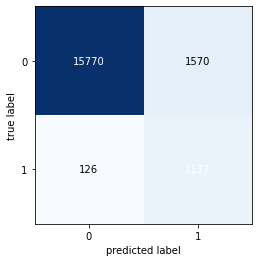

In [ ]:
xt=xtest
yt=ytest

yt_=model.predict(xt)

print(model.score(xt,yt))

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(yt,yt_)
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

In [ ]:
train

,OriginalBalance,PaidToDate,CurrentBalance,LastPaymentDateDays,LastPaymentAmount,APT/Home,EmailMatch,NoOFContact,Age,EmailDomain,EmpCat,Hous/inc,Incom,Orig-Curr,DateChargedOff_AccountOpened,DateChargedOff_Current,StatusY
0,5379.07,0.00,5408.10,177.0,-100.00,6.0,1.0,2,49.063014,15,8,79707.0,29094.0,-29.03,76.0,651.0,1
1,6223.33,908.95,5347.14,100.0,-150.00,10.0,0.0,4,51.539726,15,9,115826.0,52388.0,876.19,167.0,666.0,1
2,27219.91,0.00,27366.82,578.0,0.00,10.0,0.5,2,61.189041,15,5,115826.0,52388.0,-146.91,1125.0,3981.0,0
3,3773.14,0.00,3793.50,1056.0,228.72,10.0,1.0,2,53.178082,5,5,115826.0,52388.0,-20.36,100.0,982.0,0
4,4729.95,0.00,4824.40,186.0,-75.00,10.0,1.0,2,51.887671,10,5,93055.0,35548.0,-94.45,122.0,799.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,3977.41,1400.00,0.00,298.0,1400.00,10.0,1.0,1,44.060274,12,5,120944.0,46947.0,3977.41,150.0,989.0,1
6818,2941.18,1200.00,0.00,305.0,600.00,6.0,1.0,3,68.780822,15,8,105832.0,39677.0,2941.18,164.0,827.0,1
6819,664.48,408.95,0.00,279.0,8.95,10.0,1.0,3,66.809589,5,5,99171.0,43621.0,664.48,125.5,4627.0,1
6820,605.19,408.95,0.00,217.0,8.95,10.0,1.0,3,64.838356,15,8,105387.5,3884.0,605.19,87.0,953.0,1


In [ ]:
data=pd.read_csv('/content/train.csv')

x=data.drop(['StatusY'],1)
y=data['StatusY']

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.9,random_state=1)
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
print('Accuracy===>')
model.score(xtest,ytest)

Accuracy===>


0.8330893118594437